<b style="font-size:35px;"><center>Virtual Applied Data Science Training Institute<br /><br>(VADSTI) <br /> 03-31-2022</center></b>

 <hr style="border:0.5px solid red" />
 
<center><img src="Figures/cover_to_intro_day1_slide.PNG" style="float: center; height: 350px"></center>

---

<p /><br />


<center><b style="font-size:40px; color:#000EFF;"><em>Python Code Along -- Instructor's Solutions File</em></b></center>

<hr style="border:0.1px solid red; width: 50%;" />

### Lesson Objectives

After completing the series you will be able to use **Python** and the data provided in `Module 3, Day 1 slide #7` to implement the following tasks:

1. Estimating Statistics -- <b style="font-size:14px; color:#FE0000;"><em>Code-along -- Break 10 minutes</em></b>
    - [Load dBP sample data](#slide7) -  (_slide 7_)
    - What is the dBD mean -  (_slide 8_)
    - What is the dBP standard deviation - (_slide 9_)
    - Write your own function to compute sample statistics?
    
<p \>
    
2. Inferential statistical analysis
	- [Sampling distribution of diastolic BP](#slide17) - (_slide 17_)
	- Generate random sample from the dBP data -  (_slide 17_)
	- Compute variability statistics by drawing random samples from the dBP data (_slides 19 & 20_)
    - Compute confidence interval (_slides 21_)

<p \>

3. [Hypothesis Testing](#slide28) - (_slide 28_) <b style="font-size:14px; color:#FE0000;"><em>Code-along -- Break 10 minutes</em></b>
	- [z-test for difference in two independent means](#slide33) - (_slide 33_)
	- Categorical outcome (2 categories) - (_slide 37_)
	- Difference in independent proportions - (_slides 38, 39_)
    - [Compute $\chi^2$ value for a 2x2 contingency table](#slide42) - (_slides 42_)


<p \>

4. [Statistical Methods](#slide49) - (_slide 49_)
	- Correlation -- Fitting a Linear Model on a given dataset - (_slide 52_)
	- Add confidence boundaries (_slide 54_)


<p \>

5. [Nonparametric statistics](#slide66) - (_slide 66_)
	- [Bootstrap – randomly select an observation from sample data with replacement](#slide66) - (_slide 68_)
    - [Jackknife – leave-out-one](#slide69) - (_slide 69_)


<hr \>


#### Module 3b: Correlation and Regression  


<hr \>

1. Multivariable Models
2. Interactions
3. Multivariate models - Profile analysis
4. Generalized Linear Models
5. Count Models
6. Time-to-event Models


5. [Linear Regression](#slide_m3-9) - (_slide m3-9_)
	- [Cholesterol ~ Age](#slide_m3-9) - (_slide m3-9_)

<p \><p \><p \><p \>

<hr \>

<p \>

#### Module Module 3b: Logistic Regression and Summary  
 
<p \>

<hr \>

<p \>

<p \>

<p \>

In [ ]:
!sudo pip3 install pandas 

<center><b style="font-size:25px; color:#00FE00;">Required packages</b></center>

In [207]:
%%bash
echo "installing required packages ..."

exit    #<<<----   remove this run the intallation if necessary 
sudo pip3 install --upgrade pip  # just make sure to upgrade pip

sudo pip3 install pandas         # makes it easy working with structured (tabular and time series) data 


sudo pip3 install numpy          # "Num Pie": numeric computing library used for working with arrays
sudo pip3 install scipy          # "Sigh Pie": scientific computing library for mathematics, science, and engineering

#Plotting
sudo pip3 install matplotlib     # mainly deployed for basic plotting, fewer syntax with lots of default themes
sudo pip3 install seaborn        # a Python data visualization library based on matplotlib


#sudo pip3 install random        # built-in module to generate the pseudo-random variables
sudo pip3 install statistics     # provides functions for calculating mathematical statistics of numeric data
sudo pip3 install xlrd           # a library for reading data and formatting information from Excel 
sudo pip3 install datatable      # package for manipulating 2-dimensional tabular data structures (aka data frames

sudo -H pip3 install statsmodels # provides classes and functions for the estimation of many different statistical model
sudo -H pip3 install sklearn  # a machine learning library for Python, including several regression, classification and clustering algorithms


installing required packages ...


 <hr style="border:0.5px solid red" />
 
 <center><b style="font-size:18px; color:#FE0000;"><em>* * * Instructors' Python Coding Exercises Solution Starts at this point * * *</em></b></center>

In [1]:
#import libraries
import pandas as pd     
import numpy as np      
import random

import seaborn as sns

# Forces matplotlib graphics to show up inline
%matplotlib inline 

<a id="slide7"></a>

### 1.  Estimating Statistics

We will be using information provided on <b style="font-size:15px; color:#FE0000;"><em>slides 6 through 9</em></b> to complete **Task 1** for Module 3 Day 1


#### 1.A  Load the `dBP` and do an initial examination the underlying distribution.



In [2]:
dBP = np.array([
73, 42, 73, 67, 84, 75, 80, 78, 64, 73, 70, 92,
59, 77, 65, 69, 91, 71, 69, 62, 76, 89, 91, 79,
67, 76, 66, 80, 98, 70, 74, 71, 74, 59, 84, 73,
68, 74, 70, 72, 84, 65, 81, 54, 67, 83, 87, 63,
68, 93, 92, 71, 95, 69, 98, 74, 90, 100, 60, 82,
75, 91, 72, 82, 67, 71, 61, 94, 75, 76, 66, 76,
97, 58, 72, 57, 74, 65, 79, 73, 91, 79, 63, 80,
73, 92, 62, 82, 73, 90, 73, 83, 64, 70, 60, 79,
94, 73, 78, 99, 71, 90, 82, 74, 82, 77, 71, 64,
68, 73, 86, 89, 100, 77, 88, 72, 56, 85, 90, 88,
55, 68, 73, 85, 80, 69, 62, 73, 78, 73, 84, 70,
65, 81, 85, 90, 89, 64, 81, 77, 91, 95, 86, 73
])

#----
# alternatively you may use
dBP = np.array( pd.read_excel("Data.xls", sheet_name=0) ).reshape(-1)
dBP

array([ 73,  59,  67,  68,  68,  75,  97,  73,  94,  68,  55,  65,  42,
        77,  76,  74,  93,  91,  58,  92,  73,  73,  68,  81,  73,  65,
        66,  70,  92,  72,  72,  62,  78,  86,  73,  85,  67,  69,  80,
        72,  71,  82,  57,  82,  99,  89,  85,  90,  84,  91,  98,  84,
        95,  67,  74,  73,  71, 100,  80,  89,  75,  71,  70,  65,  69,
        71,  65,  90,  90,  77,  69,  64,  80,  69,  74,  81,  98,  61,
        79,  73,  82,  88,  62,  81,  78,  62,  71,  54,  74,  94,  73,
        83,  74,  72,  73,  77,  64,  76,  74,  67,  90,  75,  91,  64,
        82,  56,  78,  91,  73,  89,  59,  83, 100,  76,  79,  70,  77,
        85,  73,  95,  70,  91,  84,  87,  60,  66,  63,  60,  71,  90,
        84,  86,  92,  79,  73,  63,  82,  76,  80,  79,  64,  88,  70,
        73], dtype=int64)

In [3]:
#1a: Compute the dBP mean -- PowerPoint slide 8

# Using formular on slide 8 of HowardU_Introduction to statistics3-4-21.pptx 
sum_dBP          = dBP.sum()     #  sum all the elements in the dBP list
num_elements_dBP = len(dBP)      #  same as /144
dBP_mean = sum_dBP / num_elements_dBP

#Alternatively use inbuild function mean() from numpy
mean_dBP = np.mean(dBP)          # sample mean


print("\n mean_dBP = %.1f\n" %dBP_mean)


 mean_dBP = 76.3



In [208]:
type(dBP)

numpy.ndarray

In [89]:
#1b: Compute the dBP standard deviation -- PowerPoint slide 9
import numpy as np

variance = ((( dBP - np.mean(dBP) )**2 ).sum())/(144 -1)
sd = np.sqrt(variance)

print("\nSample variance using slide 9 = %.2f\n    Sample Standard Deviation = %.2f\n" % (variance, sd))


Sample variance using slide 9 = 123.65
    Sample Standard Deviation = 11.12



In [85]:
#1b: Compute the dBP standard deviation -- PowerPoint slide 9
import numpy as np

dBP_minus_mean_dBP =  ( dBP - np.mean(dBP) )**2 

type(dBP_minus_mean_dBP)
dBP_minus_mean_dBP[:4]

array([ 11.01871142, 299.96315586,  86.85204475,  69.21315586])

In [209]:
var = sum(dBP_minus_mean_dBP)//(144 -1)

In [210]:
sd = np.sqrt(var)
print(sd)

11.090536506409418


In [19]:
#c. Why divide by (144 – 1)?  -- PowerPoint slide 9

# Unbias estimator -- fundamental law of Numerical Statistics

In [211]:
# Alternately, for 1a, 1b, 1c you can use the "statistics" package
#!sudo pip3 install statistics
import statistics 

# Inbuild sample variance and sample standard deviation
statistic_mean = statistics.mean(dBP)
statistic_var = statistics.variance(dBP)
statistic_std = statistics.stdev(dBP)

print("a.    Sample mean using using statistic.mean = %.2f\n\
b. Sample variance using using statistic.var = %.2f\n\
c.          Sample Standard Deviation using  = %.2f\n\n" % (statistic_mean, statistic_var, statistic_std))


a.    Sample mean using using statistic.mean = 76.00
b. Sample variance using using statistic.var = 123.00
c.          Sample Standard Deviation using  = 11.09




In [212]:
#Challenge 1.1: Write your own functions to compute the sample mean and standard deviation of dBP sample data

# Our own function 
def mean_var_sd(data):
  n = len(data)
  #mean segment
  mean = sum(data) / n
  #variance segment
  deviations = [(x - mean) ** 2 for x in data]
  variance = sum(deviations) / n
  #std_dev segment
  std_dev = np.sqrt(variance)
  return mean, variance, std_dev


#test
result = mean_var_sd(dBP)

print("\n\nResult from own function:\n\
a.    Sample mean  =  %.2f\n\
b. Sample variance = %.2f\n\
c.  Sample Std_dev =  %.2f\n\n" % (result))





Result from own function:
a.    Sample mean  =  76.32
b. Sample variance = 122.79
c.  Sample Std_dev =  11.08




In [219]:
?sum

In [215]:
mean, variance, std_dev = result
std_dev

11.080922530899782

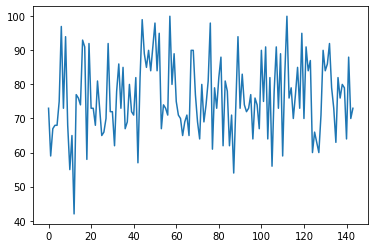

In [220]:
#Challenge 1.2: Plot the distribution of the dBP data
import matplotlib.pyplot as plt 
  
plt.plot(dBP) 
plt.show() 


C:\ProgramData\Anaconda3\envs\thesis_tensorflow_cpu_gpu_2_2_0_9_21_2020\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

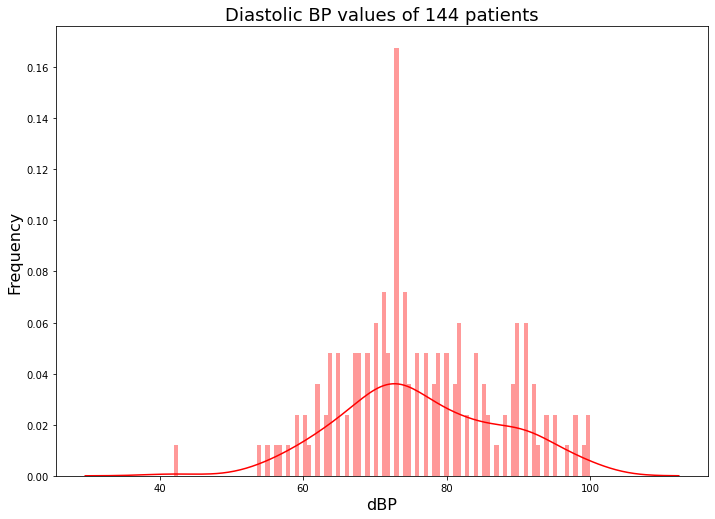

In [23]:
#OR
# Let’s plot the distribution of Treatment and control groups:
import seaborn as sns

#increase fifure size
a4_dims = (11.7, 8.27)


#Multiply (2) plots on 1 figure
fig, axs = plt.subplots(figsize=a4_dims)

sns.distplot(dBP, kde=True, color='red', bins=100)
plt.title('Diastolic BP values of 144 patients', fontsize=18)
plt.xlabel('dBP', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

    
<hr style="border:0.1px solid gray; width: 25%;" />

<b style="font-size:40px; color:#822c97">References</b>

* <https://stackabuse.com/calculating-variance-and-standard-deviation-in-python/>

* <https://www.askpython.com/python/examples/mean-and-standard-deviation-python>

***    
    
    
<p /><p />

<hr style="border:0.1px solid #822c97; width: 50%;" />

<center><b style="font-size:25px; color:##556B2F">CONGRATULATION!!!<br>YOU HAVE SUCCESSFULLY COMPLETED CODE ALONG <br />TASK 1 FOR MODULE 3 Day 1</b></center>

<a id="slide17"></a>

<hr style="color:#FE0000;border:0.5px solid red" />


### 2.  Inferential statistical analysis

We will be using information provided on <b style="font-size:15px; color:#FE0000;"><em>slides 12 through 21</em></b> to complete **Task 2** for Module 3 Day 2

<p \>

#### 2.A Recall: Research sample mean (x) ~ population mean ($\mu$) Inferential statistical analysis -- <b style="font-size:15px; color:#FE0000;"><em> Slide 16</em><b/>

<p \>
 
<center><img src="Figures/sample_and_population_mean.PNG" style="float: center; height: 350px"></center>




In [238]:
# Example: Use the following code segment to extract (draw) 2 random numbers from between 0 and 9

import random

#random.seed(4)        #to ensure a repeatable outcome

data = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]  

# Draw the samples indirectly from the data
random.sample(population=data, k=6)


[4, 0, 1, 8, 3, 2]

In [25]:
#2a Expand on the example above to draw 1 set of 5 random data from the dBP data (_slide 17_)

random.seed(4)        #to ensure a repeatable outcome

#insert your code here 

# 2a method 1 of 2: draw the samples directly
random.sample( list(dBP), 5)   #has to be a list


[75, 61, 66, 75, 84]

In [244]:
n = 5           #sample size
l = len(dBP)    #length dBP
index = np.random.randint(0, l , size=n)
index

array([ 56,  26,   4, 126,  92])

In [245]:
len(dBP)

144

In [248]:
dBP[[1, 4, 5]]

array([59, 68, 75], dtype=int64)

In [249]:
#2a: Method 2 of 2: draw the samples indirectly usingthe index
#random.sample( list(dBP), 5)   #has to be a list

random.seed(4) 

n = 5           #sample size
l = len(dBP)    #length dBP
index = np.random.randint(0, l , size=n)

sample = dBP[index] 

print(f'  Index: {index}  |   sample: {sample}')


  Index: [ 22  90  63  34 102]  |   sample: [68 73 65 73 91]


In [250]:
dBP[102]

91

In [252]:
#2b Expanding on your result in 2a, draw 12 sets of random samples each of size 5 from the dBP data 
#   and print the resulting samples. Use random.seed(4)
import random

#initialize temporary variables
n = 5                 #sample size
l = len(dBP)          #length dBP
num_samples = 24      #12 samples
random.seed(4)        #repeatable outcome

#setup output
print("\n\n          Sample size (n = %d) \n         _____________________" %n)

#compute and print values
for i in range(num_samples):
    # use 4 as a seed value  gets you the same values every time
    #random.seed(4)
    # get sample list of 5 items
    sample_list = random.sample(list(dBP), n)
    #print(f'{sample_list}  mean: {np.mean(sample_list):.2f}')
    print("%5d    %5s " % ((i+1), sample_list))

#draw bottom line
print("          _____________________")



          Sample size (n = 5) 
         _____________________
    1    [75, 61, 66, 75, 84] 
    2    [72, 81, 91, 75, 91] 
    3    [64, 74, 74, 71, 79] 
    4    [76, 74, 69, 99, 70] 
    5    [90, 74, 97, 65, 77] 
    6    [91, 57, 73, 74, 77] 
    7    [68, 71, 67, 90, 65] 
    8    [89, 65, 91, 64, 68] 
    9    [64, 98, 59, 74, 73] 
   10    [84, 91, 56, 73, 69] 
   11    [59, 70, 82, 89, 79] 
   12    [65, 65, 73, 73, 64] 
   13    [92, 82, 70, 54, 69] 
   14    [98, 91, 56, 84, 100] 
   15    [69, 90, 83, 83, 62] 
   16    [70, 98, 62, 65, 74] 
   17    [80, 64, 75, 62, 78] 
   18    [89, 74, 85, 97, 55] 
   19    [83, 73, 69, 81, 68] 
   20    [62, 69, 72, 56, 92] 
   21    [81, 91, 76, 74, 73] 
   22    [69, 76, 71, 78, 67] 
   23    [72, 65, 77, 82, 74] 
   24    [74, 73, 100, 67, 73] 
          _____________________


In [256]:
mysample = [74, 73, 100, 67, 73]
np.mean(mysample)

77.4

In [257]:
#2c Expanding on your result in 2b, by printing the mean of each of the random sample next the 
# sample values similar to data sampling output on slide 17. Use random.seed(4)

import random

#initialize temporary variables
n = 5                 #sample size
l = len(dBP)          #length dBP
num_samples = 25      #25 samples
random.seed(4)        #repeatable outcome

#setup output
print("\n\n          Sample size (n = %d)    |    Mean\n         ________________________|___________" %n)

#compute and print values
for i in range(num_samples):
    # use 4 as a seed value  gets you the same values every time
    #random.seed(4)
    # get sample list of 5 items
    sample_list = random.sample(list(dBP), n)
    #print(f'{sample_list}  mean: {np.mean(sample_list):.2f}')
    m = np.mean(sample_list)
    #print("%5d    %5s          %.2d " % ((i+1), sample_list, np.mean(sample_list)))
    print("%5d    %5s          %.2d " % ((i+1), sample_list, m))

#draw bottom line
print("          ________________________|___________")



          Sample size (n = 5)    |    Mean
         ________________________|___________
    1    [75, 61, 66, 75, 84]          72 
    2    [72, 81, 91, 75, 91]          82 
    3    [64, 74, 74, 71, 79]          72 
    4    [76, 74, 69, 99, 70]          77 
    5    [90, 74, 97, 65, 77]          80 
    6    [91, 57, 73, 74, 77]          74 
    7    [68, 71, 67, 90, 65]          72 
    8    [89, 65, 91, 64, 68]          75 
    9    [64, 98, 59, 74, 73]          73 
   10    [84, 91, 56, 73, 69]          74 
   11    [59, 70, 82, 89, 79]          75 
   12    [65, 65, 73, 73, 64]          68 
   13    [92, 82, 70, 54, 69]          73 
   14    [98, 91, 56, 84, 100]          85 
   15    [69, 90, 83, 83, 62]          77 
   16    [70, 98, 62, 65, 74]          73 
   17    [80, 64, 75, 62, 78]          71 
   18    [89, 74, 85, 97, 55]          80 
   19    [83, 73, 69, 81, 68]          74 
   20    [62, 69, 72, 56, 92]          70 
   21    [81, 91, 76, 74, 73]          79 
   22

In [266]:
ml = {"a":1, "b":3}
#pd.DataFrame(ml)

In [269]:
rows = [random.sample(list(dBP), n) for i in range(num_samples)]
print(rows)
print(type(rows))
df = pd.DataFrame(rows, columns=["A", "B", "C", "D", "E"])

print(df)

[[61, 83, 72, 73, 74], [76, 77, 65, 70, 82], [87, 79, 97, 70, 91], [65, 70, 62, 82, 61], [82, 82, 98, 67, 82], [87, 74, 90, 73, 57], [82, 73, 89, 78, 91], [89, 100, 73, 73, 94], [79, 59, 65, 73, 70], [89, 100, 70, 77, 90], [74, 71, 76, 59, 74], [90, 68, 54, 65, 73], [90, 76, 82, 59, 90], [82, 83, 65, 70, 71], [77, 54, 84, 94, 86], [73, 74, 72, 73, 64], [74, 66, 73, 59, 88], [81, 90, 71, 68, 79], [67, 73, 67, 97, 81], [69, 65, 78, 77, 100], [94, 82, 88, 91, 73], [75, 66, 54, 64, 84], [92, 60, 83, 73, 80], [82, 89, 80, 62, 62], [82, 68, 79, 75, 90]]
<class 'list'>
     A    B   C   D    E
0   61   83  72  73   74
1   76   77  65  70   82
2   87   79  97  70   91
3   65   70  62  82   61
4   82   82  98  67   82
5   87   74  90  73   57
6   82   73  89  78   91
7   89  100  73  73   94
8   79   59  65  73   70
9   89  100  70  77   90
10  74   71  76  59   74
11  90   68  54  65   73
12  90   76  82  59   90
13  82   83  65  70   71
14  77   54  84  94   86
15  73   74  72  73   64
16  74

In [272]:
# Use dataframe

#initialize temporary variables
n = 5                 #sample size
l = len(dBP)          #length dBP
num_samples = 25      #25 samples
random.seed(4)        #repeatable outcome

rows = [random.sample(list(dBP), n) for i in range(num_samples)]
#print(rows)
df = pd.DataFrame(rows,columns=["A", "B", "C", "D", "E"])

#print(df)


# add 1 to each index
df.index = df.index + 1
#display( df.head(n=2) )
# Sum the rows of DataFrame
#df['Sum'] = df.sum(axis=1)
df['Mean'] = df.mean(axis=1).astype(int)
display( df.head(n=4) )

,A,B,C,D,E,Mean
1,75,61,66,75,84,72
2,72,81,91,75,91,82
3,64,74,74,71,79,72
4,76,74,69,99,70,77


In [276]:
#2d Compute the (i) mean, (ii) SEM = SD(sample_data)/sqrt(n=len(sample_data)) -- slide 19

import numpy as np
import scipy.stats       #the scientific computing library
import statistics

sample1 = [72, 82, 73, 90, 81]
sample2 = [89, 90, 77, 80, 82]

mean_sample1 =   np.mean(sample1)
mean_sample2 =   np.mean(sample2)

n = len(sample2)

SEM_sample1 = statistics.stdev(sample1) * (1/np.sqrt(n))
SEM_sample2 = statistics.stdev(sample2) * (1/np.sqrt(n))

print("\n\nResults:\n\
a.    Sample1:  %s   | size: %d |   mean sample1: %.2f   | SEM sample1: %.3f\n" % \
      (sample1, n, mean_sample1, SEM_sample1))
print("\
b.    Sample2:  %s   | size: %d |   mean sample2: %.0f   | SEM sample2: %.0f\n" % \
      (sample2, n, mean_sample2, SEM_sample2))



Results:
a.    Sample1:  [72, 82, 73, 90, 81]   | size: 5 |   mean sample1: 79.60   | SEM sample1: 3.295

b.    Sample2:  [89, 90, 77, 80, 82]   | size: 5 |   mean sample2: 84   | SEM sample2: 3



In [274]:
SEM_sample1

3.2954514106568165

In [277]:
#Challenge 2.1 Use the formula on slide 20 to compute the 95% confidence interval for sample1 and sample2

normal_d = 2
LB_sample1 = mean_sample1 - (SEM_sample1 * normal_d)   #   (2 is standard deviation units of the normal distribution).
UB_sample1 = mean_sample1 + (SEM_sample1 * normal_d)    

LB_sample2 = mean_sample2 - (SEM_sample2 * normal_d) 
UB_sample2 = mean_sample2 + (SEM_sample2 * normal_d) 

#Compare your results to those obtained in the first 2 lines of the PowerPoint slide 20
print("\n\nResults:\n\
a.    Sample1:  %s   | size: %d |   mean: %.0f   | SEM: %.0f   | LB: %.0f  |  UB: %.0f\n" % \
      (sample1, n, mean_sample1, SEM_sample1, LB_sample1, UB_sample1))
print("\
b.    Sample2:  %s   | size: %d |   mean: %.0f   | SEM: %.0f   | LB: %0.f  |  UB: %0.f\n" % \
      (sample2, n, mean_sample2, SEM_sample2, LB_sample2, UB_sample2))                                   



Results:
a.    Sample1:  [72, 82, 73, 90, 81]   | size: 5 |   mean: 80   | SEM: 3   | LB: 73  |  UB: 86

b.    Sample2:  [89, 90, 77, 80, 82]   | size: 5 |   mean: 84   | SEM: 3   | LB: 79  |  UB: 89



In [279]:
mci1

(79.6, 3.2954514106568165, 70.45036006146469, 88.7496399385353)

In [278]:
## 2.1 Alternative solution use scipy
#So we can be a bit creative by defining a CI function

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, sem = np.mean(a), scipy.stats.sem(a)
    h = sem * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, sem, m-h, m+h
    
#Test the the function function
sample1 = [72, 82, 73, 90, 81 ]   # slide 20
sample2 = [89, 90, 77, 80, 82 ]

mci1 = mean_confidence_interval(sample1)
mci2 = mean_confidence_interval(sample2)

#print

print("        Sample            |      Mean   |    SEM    |    LB    |    UB ") 
print("  ----------------------------------------------------------------------")
print("   %s   |      %0.f     |     %0.f     |    %0.f    |    %0.f" % (sample1, mci1[0], mci1[1], mci1[2], mci1[3] ) )
print("   %s   |      %0.f     |     %0.f     |    %0.f    |    %0.f" % (sample2, mci2[0], mci2[1], mci2[2], mci2[3] ) )



        Sample            |      Mean   |    SEM    |    LB    |    UB 
  ----------------------------------------------------------------------
   [72, 82, 73, 90, 81]   |      80     |     3     |    70    |    89
   [89, 90, 77, 80, 82]   |      84     |     3     |    77    |    91


#### 2.B Recall: Table on  <b style="font-size:15px; color:#FE0000;"><em> Slide 20</em><b/>

<p \>
 
<center><img src="Figures/table_slide20.PNG" style="float: center; height: 420px"></center>


In [280]:
#Challenge 2.2 Generate a table similar to slide 20 USING THE dBP data for 10 samples each of size 5, 


# Store in a nice table (Pandas Dataframe will do)
import pandas as pd  
import random

random.seed(4)  #repeatable outcome

n = 5

iterations = 25   # 9      ###<<<<   change this for challenge 2.3

dBP_samples_list = [ random.sample(list(dBP), n) for i in range(iterations) ]

column_names = {0:'x1', 1:'x2', 2:'x3', 3:'x4', 4:'x5'}

#push data to dataframe
dBP_samples_df = pd.DataFrame(dBP_samples_list, dtype = float)

#rename columns
dBP_samples_df.rename( columns = column_names, inplace=True)

#add sample mean column
dBP_samples_df['mean'] = dBP_samples_df.mean(axis=1)


# Print only Sample, Mean, SEM, LB, and UB values

## Apply funcution to dataframe

#copy the dataframe
dBP_samples_df_slide20 = dBP_samples_df.copy()


# Apply over all columns x1:x5
ci_column_names = ["Mean", "SEM",  "LB", "UB"]

##  Next We apply the function to the dataframe
## See pandas.DataFrame.apply for examples -- 
#            https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html 
#            https://thispointer.com/pandas-apply-a-function-to-single-or-selected-columns-or-rows-in-dataframe/
c = dBP_samples_df_slide20.iloc[:,:5].apply(mean_confidence_interval, axis=1)

dBP_samples_df_slide20[ci_column_names] = pd.DataFrame(list(c.values))       # Take a note of this trick. List is always the way to go

print("\n\n  type(dBP_samples_df_slide20) is : %s\n--\n\nContent:" % (type(dBP_samples_df_slide20)))
dBP_samples_df_slide20



  type(dBP_samples_df_slide20) is : <class 'pandas.core.frame.DataFrame'>
--

Content:


,x1,x2,x3,x4,x5,mean,Mean,SEM,LB,UB
0,75.0,61.0,66.0,75.0,84.0,72.2,72.2,3.992493,61.115062,83.284938
1,72.0,81.0,91.0,75.0,91.0,82.0,82.0,3.949684,71.033920,92.966080
2,64.0,74.0,74.0,71.0,79.0,72.4,72.4,2.461707,65.565206,79.234794
3,76.0,74.0,69.0,99.0,70.0,77.6,77.6,5.500909,62.327028,92.872972
4,90.0,74.0,97.0,65.0,77.0,80.6,80.6,5.732364,64.684405,96.515595
5,91.0,57.0,73.0,74.0,77.0,74.4,74.4,5.418487,59.355869,89.444131
6,68.0,71.0,67.0,90.0,65.0,72.2,72.2,4.554119,59.555739,84.844261
7,89.0,65.0,91.0,64.0,68.0,75.4,75.4,6.004998,58.727453,92.072547
8,64.0,98.0,59.0,74.0,73.0,73.6,73.6,6.712675,54.962628,92.237372
9,84.0,91.0,56.0,73.0,69.0,74.6,74.6,6.071244,57.743525,91.456475


In [20]:
#Challenge 2.3 Expand on challenge 2.2 by increasing each of the 10 samples from 
#              (i) 5 to 15 random dBP values
#              (i) 5 to 25 random dBP values
#              (i) 5 to 50 random dBP values

# This time, Print only Sample_size, Mean, SEM, LB, and UB values, and document any 
# interesting findings you may observation


#iterations = 9      ###<<<<   change this in challenge 2.2 for challenge 2.3

In [32]:
# Challenge 2.4: Find how many time the mean is included in the sample means in either challenge 2.2 or 2.3

dp= 0

print("\n Number of samples with mean == mean(dBP) = %d\n---\n" % len(dBP_samples_df_slide20[ round(dBP_samples_df_slide20['Mean'], dp) ==  round(np.mean(dBP), dp) ] ) )

dBP_samples_df_slide20[ round(dBP_samples_df_slide20['Mean'], dp) ==  round(np.mean(dBP), dp) ]


 Number of samples with mean == mean(dBP) = 1
---



,x1,x2,x3,x4,x5,mean,Mean,SEM,LB,UB
10,59.0,70.0,82.0,89.0,79.0,75.8,75.8,5.190376,61.389207,90.210793


<hr style="border:0.1px solid gray; width: 25%;" />

<b style="font-size:40px; color:#822c97">References</b>

* <https://pynative.com/python-random-sample/>
    
* <https://note.nkmk.me/en/python-random-choice-sample-choices/>

    
    
<p /><p />

<hr style="border:0.1px solid #822c97; width: 50%;" />

<center><b style="font-size:25px; color:##556B2F">CONGRATULATION!!!<br>YOU HAVE SUCCESSFULLY COMPLETED CODE ALONG <br />TASK 2 FOR MODULE 3 Day 1</b></center>




<a id="slide28"></a>

<hr style="color:#FE0000;border:0.5px solid red" />


### 3.  Hypothesis Testing 



<a id="slide33"></a>

#### 3.A  t-test for difference in two independent means

<p />

We will be using information provided on <b style="font-size:15px; color:#FE0000;"><em>slides 28 through 39</em></b> to complete **Task 3A** for Module 3 Day 2


####  Recall: Table on  <b style="font-size:15px; color:#FE0000;"><em> Slide 28</em><b/>
<p \>
 
<center><img src="Figures/slide34.PNG" style="float: center; height: 360px"></center>



In [281]:
frame = { 'Treatment': Treatment_series, 'Control': Control_series } 
frame

{'Treatment': 0    80
 1    88
 2    76
 3    77
 4    84
 dtype: int64,
 'Control': 0    84
 1    90
 2    86
 3    77
 4    93
 dtype: int64}

   Treatment  Control
0         80       84
1         88       90
2         76       86
3         77       77
4         84       93


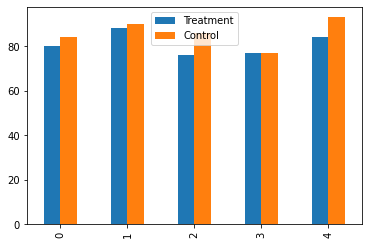

In [282]:
#3a Compute t-test for difference in two independent means shown on slide 34 


# Improt libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Given data
Treatment = [80,  88,  76,  77,  84]       # Mean = 81
Control   = [84,  90,  86,  77,  93]       # Mean = 86

#Generating a Pandas DataFrame for the 2 groups
Treatment_series = pd.Series(Treatment) 
Control_series = pd.Series(Control) 
  
frame = { 'Treatment': Treatment_series, 'Control': Control_series } 

# Resulting Dataframe
data = pd.DataFrame(frame) 

#------------
#Print resulting dataframe
print(data) 

#--------------
#Plot a density plot on Treatment and Contril datasets
# We plot data on graph

import pandas as pd 
import matplotlib.pyplot as plt 
  
data.plot.bar() 
plt.show() 



C:\ProgramData\Anaconda3\envs\thesis_tensorflow_cpu_gpu_2_2_0_9_21_2020\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\envs\thesis_tensorflow_cpu_gpu_2_2_0_9_21_2020\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Control', ylabel='Density'>

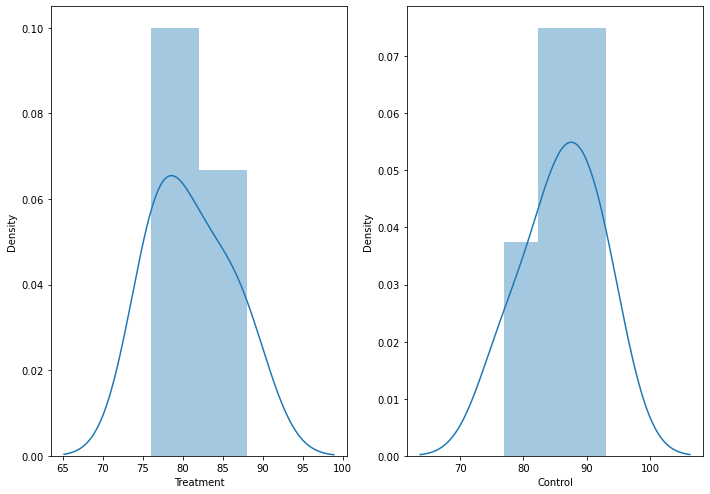

In [283]:
#----
##// alternatively
# Let’s plot the distribution of Treatment and control groups:
import seaborn as sns

#increase fifure size
a4_dims = (11.7, 8.27)


#Multiply (2) plots on 1 figure
fig, axs = plt.subplots(ncols=2, figsize=a4_dims)

sns.distplot(data.Treatment, ax=axs[0])
sns.distplot(data.Control, ax=axs[1])



In [284]:
#Compute a 95% 2-Tail z-test for the difference in Population Proportoertions
import scipy.stats as ss

# At last, we will perform the t-test -- test the sample means

t_stat, p_val= ss.ttest_ind(data.Treatment, data.Control)

print("\n\n  Treatment data: %s  |  Control data: %s |   t-stat: %.5f    |   p-value: %.5f\n---\n\n" \
      % ( data.Treatment.values, data.Control.values, t_stat, p_val) )

#----
#State the outcome of your test under H0




  Treatment data: [80 88 76 77 84]  |  Control data: [84 90 86 77 93] |   t-stat: -1.41421    |   p-value: 0.19502
---




In [285]:
?ss.ttest_ind

Question: So what does all this mean for our $H_0/H_1$ Testing?  

### Checheck your response against instructor's PowerPoint **slide 36**

* Here, our p-value is **GREATER THAN the significance level i.e 0.05**. 

* Hence, we can fail to reject the null hypothesis. 

* This means `There is no difference between the means of the Treatment and Control groups (i.e., chance)`
 

<a id="slide39"></a>


#### 3B.  Diffences in independed proportions ($\chi^2$)

<p />

We will be using information provided on <b style="font-size:15px; color:#FE0000;"><em>slide 39</em></b> to complete **Task 3B** for Module 3 Day 2


####  Recall: Table on  <b style="font-size:15px; color:#FE0000;"><em> Slide 39</em><b/>
<p \>
 
<center><img src="Figures/slide39.PNG" style="float: center; height: 360px"></center>




In [286]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

#Using the observation on slide 39, compute the z-test of diffences in proportions for the 2 samples

#                 A    B
count = np.array([84,  72])
nobs = np.array([184,  202])

#ztest
stat, pval = proportions_ztest(count, nobs)
print("\nz = %.4f      |    p = %.4f (two-sided)\n---\n\n" % (stat, pval))


z = 2.0014      |    p = 0.0454 (two-sided)
---




<a id="slide42"></a>


#### 3.C  Chi Square ($\chi^2$)

<p />

We will be using information provided on <b style="font-size:15px; color:#FE0000;"><em>slide 42</em></b> to complete **Task 3C** for Module 3 Day 2


####  Recall: Table on  <b style="font-size:15px; color:#FE0000;"><em> Slide 28</em><b/>
<p \>
 
<center><img src="Figures/Slide42.PNG" style="float: center; height: 280px"></center>


In [287]:
# That is:
E1 = 184*156/386; E2 = 184*230/386; E3 = 202*156/386; E4 = 202*230/386
chi2 = 1/E1*(84-E1)**2  +  1/E2*(100-E2)**2  +  1/E3*(72-E3)**2  +  1/E4*(130-E4)**2
chi2

4.005452239276572

In [289]:
np.array([
    [ 84, 100],
    [ 72, 130]
])

array([[ 84, 100],
       [ 72, 130]])

In [290]:
#3c Verify the chi square value computed on slide 42
import numpy as np
from scipy import stats

#data for the contingency table
table = np.array([
    [ 84, 100],
    [ 72, 130]
])

#table_col_sum = ???
#table_row_sum = ???
#table_sum = ???

table_col_sum = np.sum(table, axis=0)      #array([156, 230])          
table_row_sum = np.sum(table, axis=1)      #array([184, 202])
table_sum = np.sum(table) 


print("\n Col sums: %s   | Row sums: %s   |   Row and Col sum: %s" %\
      (table_col_sum, table_row_sum, table_sum))




 Col sums: [156 230]   | Row sums: [184 202]   |   Row and Col sum: 386


In [291]:
#--
#Compute E
#                E1           E2           E3           E4
#E = [ 74.3626943 109.6373057  81.6373057 120.3626943]
E = ([ table_col_sum * table_row_sum[0], table_col_sum * table_row_sum[1] ] / table_sum ).reshape(-1)
print(E)

#Pupulate array for Chi Sq vaules shown on slide 42
ChiSq_array = (table.reshape(-1) - E)**2

#Compuite and print Chi Square test statistic
#ChiSq = ???

ChiSq= ChiSq_array * 1/E

#the actual value
sum_ChiSq = (np.sum(ChiSq))

#P-value from Chi sq test statistic in Python
p = 1-stats.chi2.cdf(np.sum(ChiSq), 1)

print("\n Chi Square test statistics: \n%s   |  ChiSq-value: %.3f   | P-value: %.4f  \n\n" % ( ChiSq, sum_ChiSq, p))  
 


[ 74.3626943 109.6373057  81.6373057 120.3626943]

 Chi Square test statistics: 
[1.24898193 0.84713557 1.13768651 0.77164824]   |  ChiSq-value: 4.005   | P-value: 0.0454  




    
<hr style="border:0.1px solid gray; width: 25%;" />

<b style="font-size:40px; color:#822c97">References</b>

* <https://pynative.com/python-random-sample/>
    
* <https://note.nkmk.me/en/python-random-choice-sample-choices/>

* <https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html>
* <https://machinelearningmastery.com/how-to-code-the-students-t-test-from-scratch-in-python/>
* <https://towardsdatascience.com/inferential-statistics-series-t-test-using-numpy-2718f8f9bf2f>

* [Python code: From Hypothesis Test to Online Experiments with Business cases](https://towardsdatascience.com/python-code-from-hypothesis-test-to-online-experiments-with-buiness-cases-e0597c6d1ec)

* [A/B Testing for Data Science using Python – A Must-Read Guide for Data Scientists](https://www.analyticsvidhya.com/blog/2020/10/ab-testing-data-science/)

* [Dsc Type 1 And 2 Error Lab](https://learn.co/lessons/dsc-type-1-and-2-error-lab)

* [statsmodels.stats.proportion.proportions_ztest](https://www.statsmodels.org/stable/examples/index.html)

* [Hypothesis Testing of proportion-based samples](https://sonalake.com/latest/hypothesis-testing-of-proportion-based-samples/)
    
    
<p /><p />

<hr style="border:0.1px solid #822c97; width: 50%;" />

<center><b style="font-size:25px; color:##556B2F">CONGRATULATION!!!<br>YOU HAVE SUCCESSFULLY COMPLETED CODE ALONG <br />TASK 3 FOR MODULE 3 Day 2</b></center>




<a id="slide49"></a>


#### 4 Statistical Methods

<p />

We will be using information provided on <b style="font-size:15px; color:#FE0000;"><em>slides 51 through 54</em></b> to complete **Task 4** for Module 3 Day 2


####  Recall: Table on  <b style="font-size:15px; color:#FE0000;"><em> Slides 51 through 54</em><b/>
<p \>
 
<center><img src="Figures/slide51-54.PNG" style="float: center; height: 640px"></center>

In [294]:
#4.1 use pd.read_csv the patients dataset in "Data.xls" to create a Data_df dataframe
import pandas as pd

# create a HowardData_df dataframe from the "HowardData.xls", sheet_name=0
Data_df = pd.read_excel("Data.xls", sheet_name=1)
display(Data_df.head(n=3))



,PT,Cholesterol,Weight,Age
0,1,354,84,46
1,2,190,73,20
2,3,405,65,52


In [295]:
type(Data_df)

pandas.core.frame.DataFrame

In [297]:
Data_df['Age'].values

array([46, 20, 52, 30, 57, 25, 28, 36, 57, 44, 24, 31, 52, 23, 60, 48, 34,
       51, 50, 34, 46, 23, 37, 40, 30], dtype=int64)

In [300]:
#Data_df['Age'].values.reshape(-1, 1)

In [139]:
#Challenge 4A Fit a linear model to the dataset

### Building a Linear Regression Model in sklearn
# Create X and y.

#For 1 column data
X = Data_df['Age'].values.reshape(-1, 1)
y = Data_df['Cholesterol'].values.reshape(-1, 1)


# Explore X and y
print("\n---\nX = %s" % X)
print("\nClass(X): %s" % type(X))
#-
print("\n---\ny = %s" %  y)
print("\nClass(X): %s"% type(y))



---
X = [[46]
 [20]
 [52]
 [30]
 [57]
 [25]
 [28]
 [36]
 [57]
 [44]
 [24]
 [31]
 [52]
 [23]
 [60]
 [48]
 [34]
 [51]
 [50]
 [34]
 [46]
 [23]
 [37]
 [40]
 [30]]

Class(X): <class 'numpy.ndarray'>

---
y = [[354]
 [190]
 [405]
 [263]
 [451]
 [302]
 [288]
 [385]
 [402]
 [365]
 [209]
 [290]
 [346]
 [254]
 [395]
 [434]
 [220]
 [374]
 [308]
 [220]
 [311]
 [181]
 [274]
 [303]
 [244]]

Class(X): <class 'numpy.ndarray'>


In [32]:
print("\n Shape of X: %s\n\n Shape y: %s\n\n" % (X.shape, y.shape))


 Shape of X: (25, 1)

 Shape y: (25, 1)




In [52]:
X.ravel()

array([46, 20, 52, 30, 57, 25, 28, 36, 57, 44, 24, 31, 52, 23, 60, 48, 34,
       51, 50, 34, 46, 23, 37, 40, 30], dtype=int64)

In [56]:
# Calculating a Correlation Matrix with Pandas
import numpy as np
print(np.corrcoef(X.ravel(), y.ravel()))

np.corrcoef(X.ravel(), y.ravel())[0,1]

[[1.         0.83735338]
 [0.83735338 1.        ]]


0.83735338432278

In [65]:
#?np.corrcoef

In [303]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
model = linreg.fit(X, y)



In [307]:
model.intercept_

array([102.5751422])

In [304]:
print("\n\n Type of model generate: %s\n----\n" % type(linreg))
print("Model type: ", model)



 Type of model generate: <class 'sklearn.linear_model._base.LinearRegression'>
----

Model type:  LinearRegression()


In [309]:
## Challenge 4A Fit a linear model to the dataset  -- Continued

#---------------------///  Import, Instanciate, Fit ////---------------------
#scikit-learn's Four-Step Modeling Pattern
#Step 1: Import the class you plan to use.
from sklearn.linear_model import LinearRegression

#----
#Step 2: "Instantiate" the "estimator."
#- "Estimator" is scikit-learn's term for "model."
#- "Instantiate" means "make an instance of."    

#Make an instance of a LinearRegression object.
# Import, instantiate, fit.
linreg = LinearRegression()
print("\n\n Type of model generate: %s\n----\n" % type(linreg))

#----
#Step 3: Fit a LinearRegression model on X and y from the linear_model section of scikit-learn.
#        (aka "model training")
model = linreg.fit(X, y)
print("Model type: ", model)

#----
#Step 4: Explore the intercept and coefficients of the linear model
#You can search for "sklearn linear regression" and explore the attributes section of 
#the documentation to learn how to do this.

# Print the coefficients.  That is: yhat = coef1 * X _ intercept 
# Compare your computed value to those on slide 53 & 54
# chol = 102.6  + 5.5 * age
print("\n\n--\nModel Coeffiecient are:\nIntecept = %.1f  |   Coeff1 = %.1f" % (model.intercept_, model.coef_))

print("\n---\n\nResulting model:\n\n => chol = %.1f + %.1f * age" % (model.intercept_, model.coef_))

#---
#Print the R^2
print("\n\n---\nR-Squared score = %.2f   |    r(col/age) = %.2f\n\n--\n" % (model.score(X, y), np.sqrt(model.score(X, y))) )


#---
#Calculate MAE, MSE, and RMSE using imports from sklearn metrics and NumPy.


true = y
pred = model.predict(X)


# Calculate these metrics by hand!
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(true, pred))
print('MSE:', metrics.mean_squared_error(true, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(true, pred)))



#----------
# Note:




 Type of model generate: <class 'sklearn.linear_model._base.LinearRegression'>
----

Model type:  LinearRegression()


--
Model Coeffiecient are:
Intecept = 102.6  |   Coeff1 = 5.3

---

Resulting model:

 => chol = 102.6 + 5.3 * age


---
R-Squared score = 0.70   |    r(col/age) = 0.84

--

MAE: 34.24477959473871
MSE: 1737.7749715606108
RMSE: 41.68662821050187


In [310]:
pred = linreg.predict(X)


true_and_pred_df = pd.DataFrame({'pred':pred.ravel().astype(int), 'y':y.ravel()})

true_and_pred_df.head()

,pred,y
0,347,354
1,208,190
2,379,405
3,262,263
4,405,451


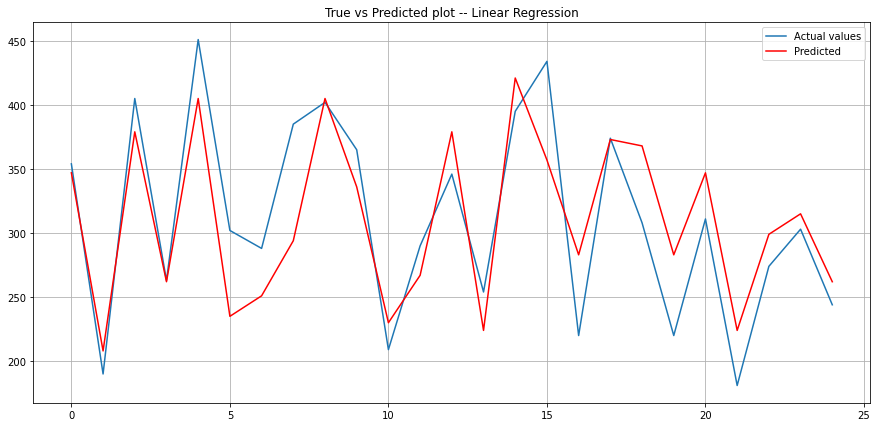

In [311]:
plt.figure(figsize=(15, 7))
plt.title('True vs Predicted plot -- Linear Regression')

plt.plot(true_and_pred_df.y.values, label='Actual values')
plt.plot(true_and_pred_df.pred,color='red',label='Predicted')
plt.legend()

plt.grid(True)
plt.show()


In [342]:
X = np.arange(20).reshape(-1, 1)
y = 2*X + 1
model = linreg.fit(X, y)
print("Model type: ", model)

y_pred = linreg.predict(X)
print(y_pred)

Model type:  LinearRegression()
[[ 1.]
 [ 3.]
 [ 5.]
 [ 7.]
 [ 9.]
 [11.]
 [13.]
 [15.]
 [17.]
 [19.]
 [21.]
 [23.]
 [25.]
 [27.]
 [29.]
 [31.]
 [33.]
 [35.]
 [37.]
 [39.]]


In [341]:
y

array([[ 1],
       [ 3],
       [ 5],
       [ 7],
       [ 9],
       [11],
       [13],
       [15],
       [17],
       [19],
       [21],
       [23],
       [25],
       [27],
       [29],
       [31],
       [33],
       [35],
       [37],
       [39]])

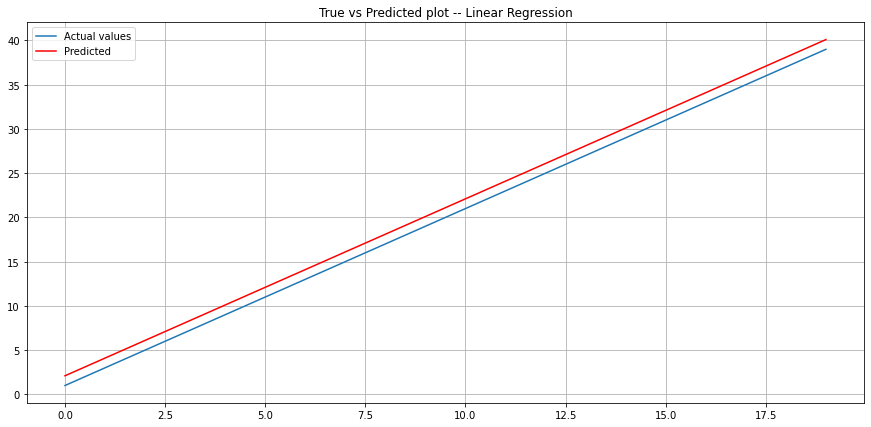

In [347]:
plt.figure(figsize=(15, 7))
plt.title('True vs Predicted plot -- Linear Regression')
y_pred = y_pred + 0.5
plt.plot(y, label='Actual values')
plt.plot(y_pred,color='red',label='Predicted')
plt.legend()

plt.grid(True)
plt.show()

In [357]:
model.coef_[0] *x + model.intercept_[0]
x.ravel()
(model.coef_[0] *x + model.intercept_[0]).ravel()

array([ 1.        ,  3.11111111,  5.22222222,  7.33333333,  9.44444444,
       11.55555556, 13.66666667, 15.77777778, 17.88888889, 20.        ,
       22.11111111, 24.22222222, 26.33333333, 28.44444444, 30.55555556,
       32.66666667, 34.77777778, 36.88888889, 39.        ])

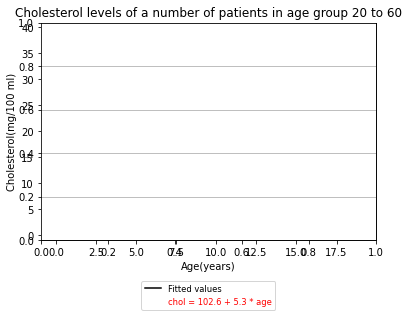

In [372]:

#----
##Challenge 4B Plot a linear model to the dataset

from matplotlib.font_manager import FontProperties

fontP = FontProperties()
fontP.set_size('small')


plt.scatter(X, y, color="darkred")

## Create a range of points. Compute yhat = coeff1 * X + intercep and plot
x = np.linspace( min(X), max(X), np.ptp(X,axis=0)[0])     
#print(x)
# same as: 
#x = np.linspace( 20, 60, 20)     
#x
#---
#Challenge 4 Generate a plot silimar to that on slide 54
plt.plot(x, model.coef_[0][0] *x + model.intercept_[0], color='black', ls="-", label="Fitted values")
plt.plot(x, model.coef_[0][0] *x + model.intercept_[0], color='black', ls="", 
                label="chol = 102.6 + 5.3 * age")


plt.title("Cholesterol levels of a number of patients in age group 20 to 60")
plt.xlabel("Age(years)")
plt.ylabel("Cholesterol(mg/100 ml)")

#add legend
legend2 = plt.legend(loc="lower center", title="", prop=fontP, bbox_to_anchor=(0.5, -0.34))

#l = plt.legend()
legend2.get_texts()[1].set_color("red")

#Turn on the grid
#plt.grid()
ax = plt.axes()        
ax.yaxis.grid() # horizontal lines
#ax.xaxis.grid() # vertical

plt.show()

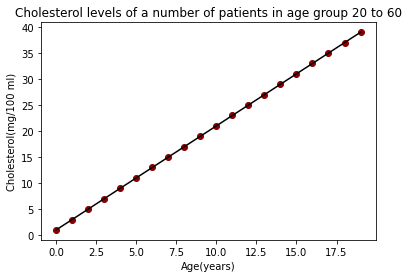

In [371]:
plt.scatter(X, y, color="darkred")
plt.title("Cholesterol levels of a number of patients in age group 20 to 60")
plt.xlabel("Age(years)")
plt.ylabel("Cholesterol(mg/100 ml)")
plt.plot(x, model.coef_[0][0] *x + model.intercept_[0], color='black', ls="-", label="Fitted values")
plt.plot(x, model.coef_[0][0] *x + model.intercept_[0], color='black', ls="", 
                label="chol = 102.6 + 5.3 * age")

AttributeError: 'Text' object has no attribute 'show'

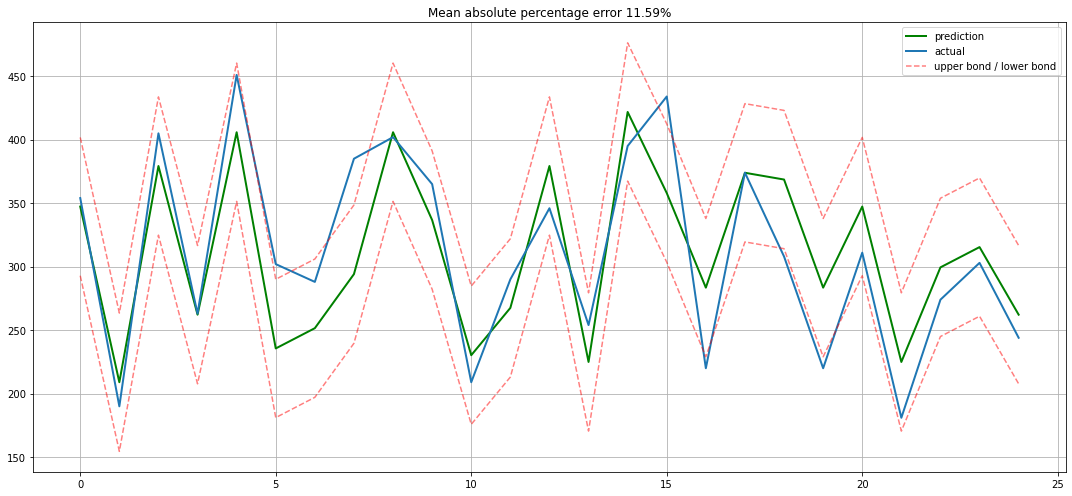

In [315]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import TimeSeriesSplit

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def plotModelResults(model, X=X, y=y, plot_intervals=False):
    """
        Plots modelled vs fact values, prediction intervals
    
    """
    
    prediction = model.predict(X)
    
    plt.figure(figsize=(15, 7))
    plt.plot(prediction, "g", label="prediction", linewidth=2.0)
    plt.plot(y, label="actual", linewidth=2.0)
    
    if plot_intervals:
        cv = cross_val_score(model, X, y, 
                                    cv=tscv, 
                                    scoring="neg_mean_absolute_error")
        mae = cv.mean() * (-1)
        deviation = cv.std()
        
        scale = 1.96
        lower = prediction - (mae + scale * deviation)
        upper = prediction + (mae + scale * deviation)
        
        plt.plot(lower, "r--", label="upper bond / lower bond", alpha=0.5)
        plt.plot(upper, "r--", alpha=0.5)
        
    error = mean_absolute_percentage_error(prediction, y)
    plt.title("Mean absolute percentage error {0:.2f}%".format(error))
    plt.legend(loc="best")
    plt.tight_layout()
    plt.grid(True);
    

tscv = TimeSeriesSplit(n_splits=3) 
plotModelResults(linreg, plot_intervals=True)

In [36]:
####Challenge 4C Generate a plot silimar to that on slide 54




## You may use sample code provided here: https://tomholderness.wordpress.com/2013/01/10/confidence_intervals/





## *** William Skipped intentionally  ***




In [63]:
1 - 1/74

0.9864864864864865

In [60]:
#!pip install lifelines

<AxesSubplot:xlabel='timeline'>

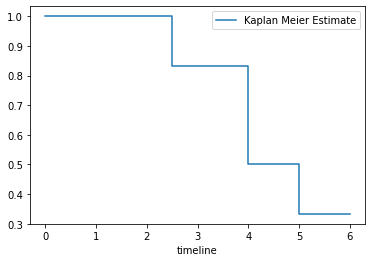

In [317]:
# Python code to create the above Kaplan Meier curve -- slide 60
# Taken form: https://towardsdatascience.com/survival-analysis-intuition-implementation-in-python-504fde4fcf8e

from lifelines import KaplanMeierFitter

## Example Data 
durations = [5,6,6,2.5,4,4]
event_observed = [1, 0, 0, 1, 1, 1]

## create a kmf object
kmf = KaplanMeierFitter() 

## Fit the data into the model
kmf.fit(durations, event_observed,label='Kaplan Meier Estimate')

## Create an estimate
kmf.plot(ci_show=False) ## ci_show is meant for Confidence interval, since our data set is too tiny, thus i am not showing it.


<AxesSubplot:xlabel='timeline'>

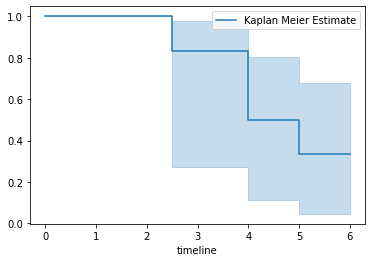

In [318]:
kmf.plot(ci_show=True)

  
<hr style="border:0.1px solid gray; width: 25%;" />

<b style="font-size:40px; color:#822c97">References</b>

* <https://tomholderness.wordpress.com/2013/01/10/confidence_intervals/>

<p /><p />

<hr style="border:0.1px solid #822c97; width: 50%;" />

<center><b style="font-size:25px; color:##556B2F">CONGRATULATION!!!<br>YOU HAVE SUCCESSFULLY COMPLETED CODE ALONG <br />TASK 4 OR MODULE 3 Day 1</b></center>

<a id="slide66"></a>

<hr style="color:#FE0000;border:0.5px solid red" />


### 5 Nonparametric statistics

<p />


#### 5.A  <b style="font-size:15px; color:#FE0000;"><em>Bootstrap</em></b> – randomly select an observation from sample data <b style="font-size:15px; color:#FE0000;"><em>with replacement</em></b>

<p />


We will be using information provided on <b style="font-size:15px; color:#FE0000;"><em>slide 68</em></b> to complete **Task 5** for Module 3 Day 2


####  Recall: Figure on  <b style="font-size:15px; color:#FE0000;"><em> Slide 68</em><b/>
<p \>
 
<center><img src="Figures/slide68.PNG" style="float: center; height: 320px"></center>

In [319]:
mean_dBP_samples, mysample_size, replications = [], 5, 10 

#Use the for loop to poplutate the mean_dBP_samples data 
for i in range(replications):
    temp_sample = np.random.choice(a=dBP, size=mysample_size, replace=True, p=None)
    sample_mean = np.mean(temp_sample)
    #append the mean to the mean_dBP_samples
    mean_dBP_samples.append(sample_mean)
    

In [320]:
mean_dBP_samples

[69.2, 73.0, 74.6, 85.4, 72.6, 85.4, 75.2, 65.8, 73.2, 75.6]

In [321]:
#5a.ii
# Calculate bootstrapped mean and 95% confidence interval.
boot_mean = np.mean(mean_dBP_samples)
boot_95_ci = np.percentile(mean_dBP_samples, [2.5, 97.5])
print("\n---\nBootstrapped dBP Sample_size = {}   | Mean = {}   |  95% CI = {}\n\n".format(mysample_size, boot_mean, boot_95_ci))



---
Bootstrapped dBP Sample_size = 5   | Mean = 75.00000000000001   |  95% CI = [66.565 85.4  ]




In [37]:
#5a Use bootstrapping to compute the *95%* confidence interval (CI) for the average dBP
import numpy as np

#Use this sample code to solve problem 5a
np.random.seed(123)

# Uncomment and run the following line
# ?np.random.choice

#See what np.random does
temp_sample= np.random.choice(a= np.arange(10), size=3, replace=True, p=None)
print("\n 1: temp_sample = %s \n--\n" %(temp_sample))

temp_sample= np.random.choice(a= np.arange(10), size=5, replace=True, p=None)
print("\n 1: temp_sample = %s \n--\n" %(temp_sample))


#--
#5a.i  
# Draw a 10 random samples each of size 5 from the dBP data with replacement and append mean to mean_dBP .

#mean_dBP_samples is an empty list, mysample_size=5, replications=10 
mean_dBP_samples, mysample_size, replications = [], 5, 10 

#Use the for loop to poplutate the mean_dBP_samples data 
for i in range(replications):
    temp_sample = np.random.choice(a=dBP, size=mysample_size, replace=True, p=None)
    sample_mean = np.mean(temp_sample)
    #append the mean to the mean_dBP_samples
    mean_dBP_samples.append(sample_mean)
    
    
#5a.ii
# Calculate bootstrapped mean and 95% confidence interval.
boot_mean = np.mean(mean_dBP_samples)
boot_95_ci = np.percentile(mean_dBP_samples, [2.5, 97.5])
print("\n---\nBootstrapped dBP Sample_size = {}   | Mean = {}   |  95% CI = {}\n\n".format(mysample_size, boot_mean, boot_95_ci))



#5a.ii Try with different sample sizes 
# Trivial -- simply change
# #mean_dBP_samples is an empty list, mysample_size=5, replications=10 
mean_dBP_samples, mysample_size, replications = [], 15, 10 

#Then paset the code in 5a.i here or even better write a function and make a call to 
#the function with diffrent values 


#5a.iii Document your obsertations





 1: temp_sample = [2 2 6] 
--


 1: temp_sample = [1 3 9 6 1] 
--


---
Bootstrapped dBP Sample_size = 5   | Mean = 75.44   |  95% CI = [70.23 79.53]




In [322]:
## Using Python
# 1: https://medium.com/swlh/bootstrap-sampling-using-pythons-numpy-85822d868977
# 2: https://www.journaldev.com/45580/bootstrap-sampling-in-python

import numpy as np 
import matplotlib.pyplot as plt

np.random.seed(123) # to set seed for consistency 
weight_pop = np.random.randint(100,240,size = 500000)# simulated population distribution
weight_pop

print(np.mean(weight_pop))# population mean

np.std(weight_pop)# population std

169.633012


40.39571209680374

In [74]:
weight_sample = np.random.choice(weight_pop, size = 1000)

sample_mean = np.mean(weight_sample)# sample mean
sample_mean

sample_std = np.std(weight_sample)# sample std
sample_std

40.466218886869086

In [75]:
boot_means = []
for _ in range(10000):
    boot_sample = np.random.choice(weight_sample,replace = True, size = 1000) # take a random sample each iteration
    boot_mean = np.mean(boot_sample)# calculate the mean for each iteration
    boot_means.append(boot_mean) # append the mean to boot_means
boot_means_np = np.array(boot_means) # transform it into a numpy array for calculation

boot_means_np

array([169.023, 168.843, 168.031, ..., 169.98 , 167.204, 172.015])

In [323]:
#---
#Challenge 5 Modify code to compute the *95%* confidence interval (CI) for the `median` dBP 


## Median

median_dBP_samples, mean_dBP_samples, mysample_size, replications = [], [], 15, 10    #median_dBP_samples & mean_dBP_samples are empty lists, mysample_size=5, replications=1000 

for i in range(replications):
    temp_sample = np.random.choice(a=dBP, size=mysample_size, replace=True, p=None)
    mean_dBP_samples.append(np.mean(temp_sample))       #sample mean
    median_dBP_samples.append(np.median(temp_sample))     #sample median
    
# Calculate bootstrapped statistics and their 95% confidence intervals.
est_mean           = np.mean(dBP)
boot_mean          = np.mean(mean_dBP_samples)
boot_95_mean_ci    = np.percentile(mean_dBP_samples, [2.5, 97.5])
mean_ci_length     = boot_95_mean_ci[1] - boot_95_mean_ci[0] 

est_median         = np.median(dBP)
boot_median        = np.median(median_dBP_samples)
boot_95_median_ci  = np.percentile(median_dBP_samples, [2.5, 97.5])
median_ci_length   = boot_95_median_ci[1] - boot_95_median_ci[0] 


print("                            Bootstrapped")
print("________________________________________________________________________________________________________")
print(" Sample Size |  Replications | Actual estimate   |   Sample Estimate  |       95% CI      |  Length CI  |")
print("_____________|_______________|___________________|____________________|___________________|_____________|")

print(f'     {mysample_size:3d}     | {replications:8d}      |   Mean = {est_mean:.2f}    |   Mean = {boot_mean:.2f}    |  {boot_95_mean_ci}    |   {mean_ci_length:.1f}')
print(f'     {mysample_size:3d}     | {replications:8d}      | Median = {est_median:.2f}    |   Mean = {boot_median:.2f}    |  {boot_95_median_ci}   |   {median_ci_length:.1f}')


                            Bootstrapped
________________________________________________________________________________________________________
 Sample Size |  Replications | Actual estimate   |   Sample Estimate  |       95% CI      |  Length CI  |
_____________|_______________|___________________|____________________|___________________|_____________|
      15     |       10      |   Mean = 76.32    |   Mean = 76.37    |  [72.98833333 79.67833333]    |   6.7
      15     |       10      | Median = 74.00    |   Mean = 74.50    |  [72.225 79.   ]   |   6.8


<a id="slide69"></a>

***


#### 5.B  <b style="font-size:15px; color:#FE0000;"><em>Jacknife</em></b> – leave-out-one

<p />


We will be using information provided on <b style="font-size:15px; color:#FE0000;"><em>slide 69</em></b> to complete **Task 5B** for Module 3 Day 2


####  Recall: Figure on  <b style="font-size:15px; color:#FE0000;"><em> Slide 69</em><b/>
<p \>
 
<center><img src="Figures/slide69.PNG" style="float: center; height: 360px"></center>

In [328]:
replications = 5
index = np.arange(replications)
index

array([0, 1, 2, 3, 4])

In [329]:
np.random.seed(123)

# Leave one observation out from dPB data to get the jackknife sample and store the mean value fo each sample
mean_dBP_samples, replications = [], len(dBP)   #mean_dBP_samples are empty lists, replications=1000 

index = np.arange(replications)                      # array([  0,   1,   2,   3, .... 143])

print(f'\n Original data:\n{dBP}')

for i in range(replications):
    jk_sample = dBP[index != i]
    mean_dBP_samples.append(np.mean(jk_sample))      #compute statistic
    
    # for debugging purposes only print out a fee sample
    if i < 4 or i > 140:
        print(f'\n Leaving out index {i} | Jacknife estimate: {np.mean(jk_sample):.2f}\n Jacknife sample data:\n{jk_sample}')    

# The jackknife estimate is the mean of dBP from each sample
mean_dBP_jk = np.mean(np.array(mean_dBP_samples))
print(f'\n\n-----\n\nFinally:\n\nThe true Jackknife estimate of the mean dBP = {mean_dBP_jk:.2f}\n')



 Original data:
[ 73  59  67  68  68  75  97  73  94  68  55  65  42  77  76  74  93  91
  58  92  73  73  68  81  73  65  66  70  92  72  72  62  78  86  73  85
  67  69  80  72  71  82  57  82  99  89  85  90  84  91  98  84  95  67
  74  73  71 100  80  89  75  71  70  65  69  71  65  90  90  77  69  64
  80  69  74  81  98  61  79  73  82  88  62  81  78  62  71  54  74  94
  73  83  74  72  73  77  64  76  74  67  90  75  91  64  82  56  78  91
  73  89  59  83 100  76  79  70  77  85  73  95  70  91  84  87  60  66
  63  60  71  90  84  86  92  79  73  63  82  76  80  79  64  88  70  73]

 Leaving out index 0 | Jacknife estimate: 76.34
 Jacknife sample data:
[ 59  67  68  68  75  97  73  94  68  55  65  42  77  76  74  93  91  58
  92  73  73  68  81  73  65  66  70  92  72  72  62  78  86  73  85  67
  69  80  72  71  82  57  82  99  89  85  90  84  91  98  84  95  67  74
  73  71 100  80  89  75  71  70  65  69  71  65  90  90  77  69  64  80
  69  74  81  98  61  79  73  82  

<p /><p />

***

<b style="font-size:40px; color:#00FF00">References</b>

* <https://goodboychan.github.io/chans_jupyter/python/datacamp/statistics/modeling/2020/06/22/01-Resampling-methods.html#Bootstrapping>
* <https://people.duke.edu/~ccc14/sta-663/ResamplingAndMonteCarloSimulations.html>
* <https://machinelearningmastery.com/calculate-bootstrap-confidence-intervals-machine-learning-results-python/>



# Additional References

* <https://moderndive.com/>

* <https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce>

* <https://towardsdatascience.com/demystifying-hypothesis-testing-with-simple-python-examples-4997ad3c5294>


***
   
<p /><p />


<hr style="color:#FE0000;border:0.5px solid red;width:75%" />

<p /><p />


<center><b style="font-size:30px; color:#013220">CONGRATULATION!!!<br \><br \><br \><br \>YOU HAVE SUCCESSFULLY COMPLETED <br \><br \>ALL YOUR CODING TASKS FOR <br \><br \>MODULE 3</b></center>



<hr style="color:#FE0000;border:0.5px solid red" />

<p /><p />



In [330]:
##Slide 19  - Specificity 

from sklearn.metrics import recall_score
y_true = [0, 1, 0, 0, 1, 0]
y_pred = [0, 0, 1, 1, 0, 1]
recall_score(y_true, y_pred, pos_label=0)

0.25

In [173]:
#!pip install scikit-plot

[[1 3]
 [2 0]]


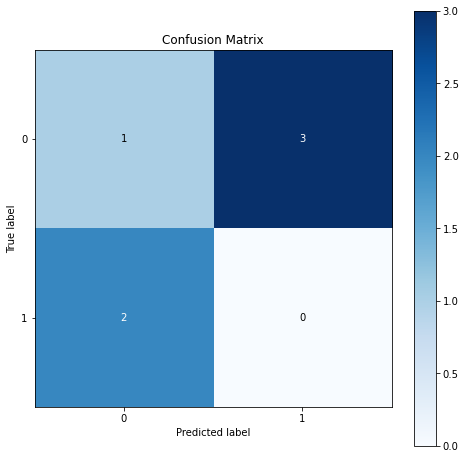

In [331]:
## Slide 15
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html

from sklearn.metrics import confusion_matrix
import scikitplot as skplt

print(confusion_matrix(y_true, y_pred))
skplt.metrics.plot_confusion_matrix(y_true, y_pred,figsize=(8,8))
plt.show()

In [332]:
cm = confusion_matrix(y_true, y_pred)
print(cm)
type(cm)

[[1 3]
 [2 0]]


numpy.ndarray

In [333]:
cm = np.array([[231, 27], [32, 54]])
cm

array([[231,  27],
       [ 32,  54]])

In [195]:
#!pip install pretty_confusion_matrix

     1   2
1  231  27
2   32  54


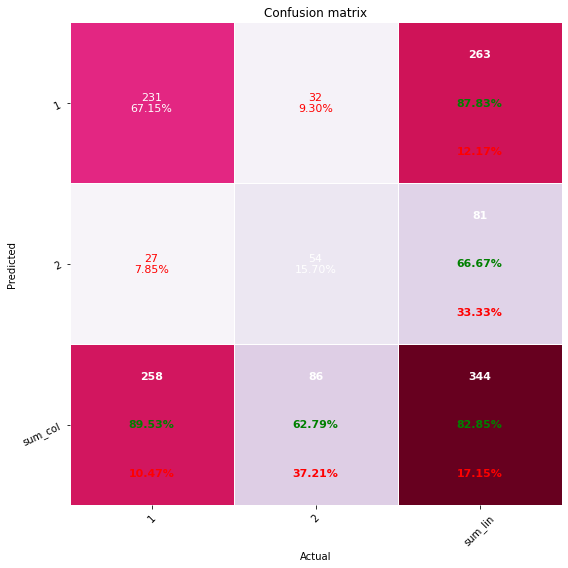

In [334]:
from pretty_confusion_matrix import pp_matrix

df_cm = pd.DataFrame(cm, index=range(1, 3), columns=range(1, 3))
print(df_cm)


# colormap: see this and choose your more dear
cmap = 'PuRd'
pp_matrix(df_cm, cmap=cmap)

plt.show()

In [192]:
print(confusion_matrix(y_true, y_pred))
skplt.metrics.plot_confusion_matrix(cm,figsize=(8,8))
plt.show()

[[1 3]
 [2 0]]


TypeError: plot_confusion_matrix() missing 1 required positional argument: 'y_pred'

In [ ]:
X = 

<a id="slide_m-3"></a>
<hr>

##  Module 3 - Day 3 -- Thursday, March 31, 2022

<hr>

## Module 3b: Correlation and Regression  

### Outline

1. Multivariable Models
2. Interactions
3. Multivariate models - Profile analysis
4. Generalized Linear Models
5. Count Models
6. Time-to-event Models


In [143]:

#Libraries

#!pip install xlrd 
#!pip pandas_profiling
#!pip install sweetviz

In [181]:
## Steps

# Load modules 
import numpy as np
import pandas as pd
import statsmodels.api as sm

#!pip install pandas_profiling
import pandas_profiling

#!pip install sweetviz
import sweetviz

# importing/Load data - create a HowardData_df dataframe from the "HowardData.xls", sheet_name=1
#df = pd.read_excel("HowardData.xls", sheet_name=1)
df = pd.read_excel("Data.xls", sheet_name=1)

print(df.head())
# Explore your dataset to help you identify and select your y and X variables
#* See: https://www.analyticsvidhya.com/blog/2021/04/top-python-libraries-to-automate-exploratory-data-analysis-in-2021/
#importing required packages

#descriptive statistics
#1: With pandas_profiling
#pandas_profiling.ProfileReport(df)

#2: With sweetviz
#my_report  = sweetviz.analyze([df,'Train'], target_feat='SalePrice')
#my_report.show_html('FinalReport.html')

   PT  Cholesterol  Weight  Age
0   1          354      84   46
1   2          190      73   20
2   3          405      65   52
3   4          263      70   30
4   5          451      76   57


Text(0, 0.5, 'Frequency')

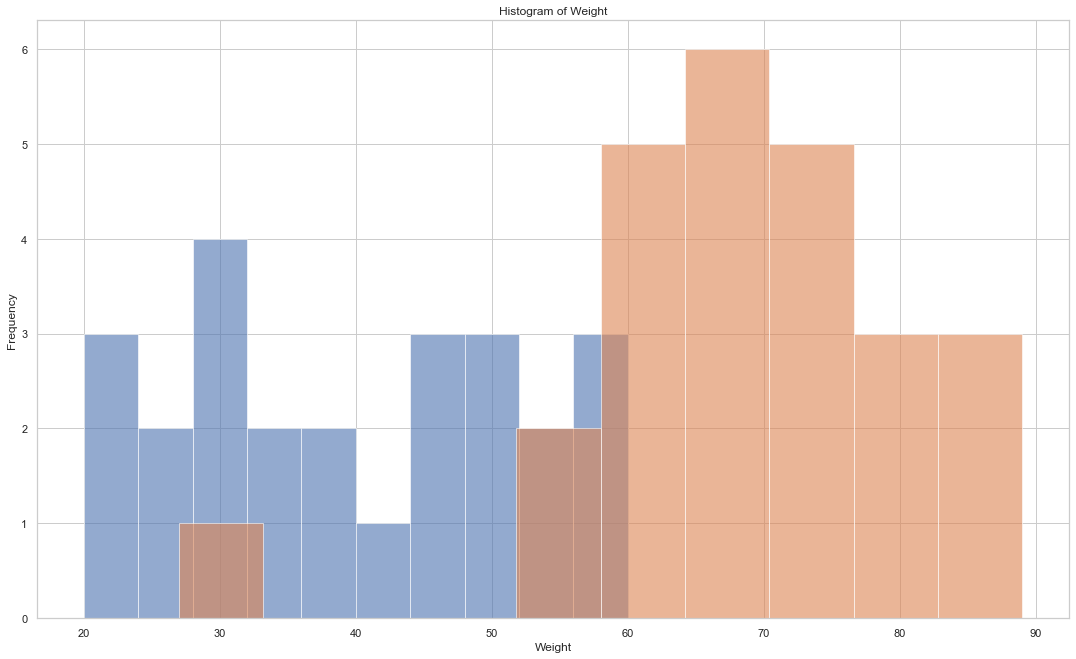

In [148]:
#This is better
df.Age.hist( alpha = 0.6)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

df.Weight.hist( alpha = 0.6)
plt.title('Histogram of Weight')
plt.xlabel('Weight')
plt.ylabel('Frequency')

#Observation
#Most of the customers of the bank in this dataset are in the age range of 50+.#

In [149]:
# Drop variables that need to be dropped and select your y and X variables
## Corplot
corr = df.drop('PT', axis=1).corr()

corr.style.background_gradient(cmap='coolwarm')

,Cholesterol,Weight,Age
Cholesterol,1.000000,0.265293,0.837353
Weight,0.265293,1.000000,0.240013
Age,0.837353,0.240013,1.000000


In [170]:
# Define dependent and independent variables
## Note: see how the selection is doen for 2 variables -- i.e., for multiple regression. 
#  If you just want to use one variable for simple linear regression, 
#  then use X = df['Age'] for example.Alternatively, you may add additional variables within the brackets
  
y = Data_df['Cholesterol']       #pandas.core.series.Series
X = Data_df[['Age','Weight']]   #pandas.core.frame.DataFrame
print(type(y)); print(type(X))

display(y.head(n=2))
display(X.head(n=2))


# adding a constant
X = sm.add_constant(X) 

#----------------------------------------------------------------------------
#Recall: Import, instantiate, fit.
#---------------------------------
# 
#Step 3: Fit a LinearRegression model on X and y from the linear_model section of scikit-learn.
#        (aka "model training")

model = sm.OLS(y, X)
print("Model type: ", model)

print("\n========================  With sklearn =========================")
# with sklearn
linreg = linear_model.LinearRegression()
print("\n\n Type of model generate: %s\n----\n" % type(linreg))
linreg.fit(X, y)

print("Model type: ", linreg)
print('Intercept: \n', linreg.intercept_)
print('Coefficients: \n', linreg.coef_)

# prediction with sklearn
constant=1; Age=50; Weight=75.4
NewX = [[constant, Age, Weight]]
print(NewX)
print ('Predicted Cholesterol level: \n', linreg.predict(NewX))


print("\n========================  With statsmodels =========================")
# with statsmodels
 
ols_model = sm.OLS(y, X).fit()   ##Make an instance of a OLS object  ols_model = sm.OLS(y,X).fit()
predictions = ols_model.predict(X) 
 
print_ols_model = ols_model.summary()
print(print_ols_model)

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


0    354
1    190
Name: Cholesterol, dtype: int64

,Age,Weight
0,46,84
1,20,73


Model type:  <statsmodels.regression.linear_model.OLS object at 0x0000020EFCE755E0>

========================  With sklearn =========================


 Type of model generate: <class 'sklearn.linear_model._base.LinearRegression'>
----

Model type:  LinearRegression()
Intercept: 
 77.98253861487552
Coefficients: 
 [0.         5.21659081 0.4173621 ]
[[1, 50, 75.4]]
Predicted Cholesterol level: 
 [370.2811813]

========================  With statsmodels =========================
                            OLS Regression Results                            
Dep. Variable:            Cholesterol   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     26.36
Date:                Wed, 30 Mar 2022   Prob (F-statistic):           1.44e-06
Time:                        12:36:18   Log-Likelihood:                -128.54
No. Observations:                  25   AIC:

##  Now we take a look at Slide #9 of HowardU_regesssion3-31-22

In [176]:
# Slide 9  --
#  See: https://www.projectpro.io/article/types-of-regression-analysis-in-machine-learning/410#mcetoc_1fbbt5ar3o
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm

# The data
# create a HowardData_df dataframe from the "HowardData.xls", sheet_name=1
Data_df = pd.read_excel("Data.xls", sheet_name=1)
#HowardData_df = pd.read_excel("./HowardData.xls", sheet_name=0)
display(Data_df.head(n=3))

# Age 
X = Data_df[['Age']]   #series

#----
# Age + Weight + Age*Weight
X = Data_df[['Age', 'Weight']]   #series
#X['Weight_Age'] = Data_df.Age * Data_df.Weight

#----
y = Data_df['Cholesterol']      #pandas.core.series.Series

print("\n========================  With sklearn =========================")
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, y)

#print((regr))

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# prediction with sklearn
#New_Interest_Rate = 2.75
#New_Unemployment_Rate = 5.3
#print ('Predicted Stock Index Price: \n', regr.predict([[New_Interest_Rate ,New_Unemployment_Rate]]))

print("\n========================  With statsmodels =========================")
# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

,PT,Cholesterol,Weight,Age
0,1,354,84,46
1,2,190,73,20
2,3,405,65,52



========================  With sklearn =========================
Intercept: 
 77.98253861487552
Coefficients: 
 [5.21659081 0.4173621 ]

========================  With statsmodels =========================
                            OLS Regression Results                            
Dep. Variable:            Cholesterol   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     26.36
Date:                Wed, 30 Mar 2022   Prob (F-statistic):           1.44e-06
Time:                        12:46:45   Log-Likelihood:                -128.54
No. Observations:                  25   AIC:                             263.1
Df Residuals:                      22   BIC:                             266.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
   

In [178]:
# Slide 15
# Generalized Linear Models 
# https://www.statsmodels.org/v0.10.1/glm.html
# https://www.statsmodels.org/stable/regression.html
# https://regenerativetoday.com/logistic-regression-model-analysis-visualization-and-prediction/

# The data
dataset = pd.read_excel("./HowardData.xls", sheet_name=0)
dataset.columns = ["dBP", "Drug", "Age", "Sex"]
dataset.head(n=3)

## Example1
formular1 = "dBP ~ Drug + Age + Sex + Drug*Age + Drug*Sex"
formular2 = "dBP ~ Drug + Age + Sex + Drug*Age"

#model = sm.GLM.from_formula(formular, family = sm.families.Binomial(), data=dataset)
model = sm.OLS.from_formula(formular2, data=dataset)
result = model.fit()
print(result.summary())

#-------------------
## Example2
#model = sm.GLM.from_formula("CD ~ Age", family = sm.families.Binomial(), data=dataset)
#result = model.fit()
#print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    dBP   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     21.29
Date:                Wed, 30 Mar 2022   Prob (F-statistic):           1.04e-13
Time:                        12:53:58   Log-Likelihood:                -516.28
No. Observations:                 144   AIC:                             1043.
Df Residuals:                     139   BIC:                             1057.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        68.6732      5.389     12.744

In [179]:
#Read dataset 
import pandas as pd

# create a HowardData_df dataframe from the "HowardData.xls", sheet_name=1
Data_df = pd.read_excel("Data.xls", sheet_name=1)
HowardData_df = pd.read_excel("./HowardData.xls", sheet_name=0)
display(Data_df.head(n=3))
display(HowardData_df.head(n=3))

,PT,Cholesterol,Weight,Age
0,1,354,84,46
1,2,190,73,20
2,3,405,65,52


,dBP,drug,age,sex
0,73.0,0,65.0,1
1,59.0,1,47.0,1
2,67.0,1,89.0,0


In [4]:
# observe colesterol -- dependent variable  - target

Data_df['Cholesterol'].unique()

array([354, 190, 405, 263, 451, 302, 288, 385, 402, 365, 209, 290, 346,
       254, 395, 434, 220, 374, 308, 311, 181, 274, 303, 244], dtype=int64)

In [14]:
#Data exploration
display(Data_df.shape)
Data_df['Cholesterol'].value_counts().sort_values(ascending=False).head()


(25, 4)

220    2
354    1
405    1
263    1
451    1
Name: Cholesterol, dtype: int64

In [3]:
# Visual
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

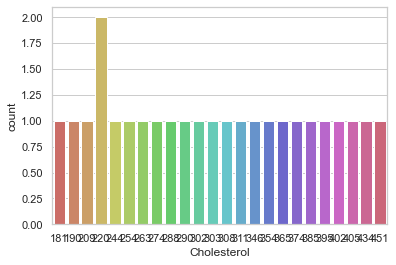

In [12]:
#plot
sns.countplot(x='Cholesterol', data=Data_df, palette='hls')
plt.show()


Text(0, 0.5, 'Frequency')

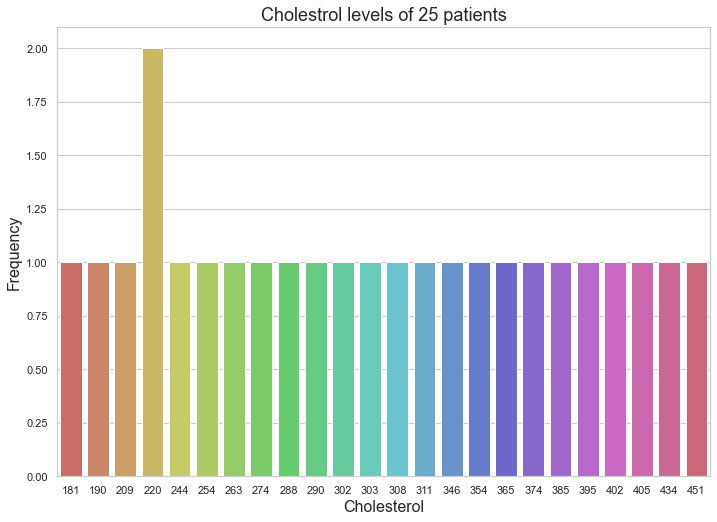

In [15]:
#increase fifure size
a4_dims = (11.7, 8.27)

#Multiply (2) plots on 1 figure
fig, axs = plt.subplots(figsize=a4_dims)

sns.countplot(x='Cholesterol', data=Data_df, palette='hls')
plt.title('Cholestrol levels of 25 patients', fontsize=18)
plt.xlabel('Cholesterol', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

Text(0.5, 1.0, 'Cholestrol data grouped by Age')

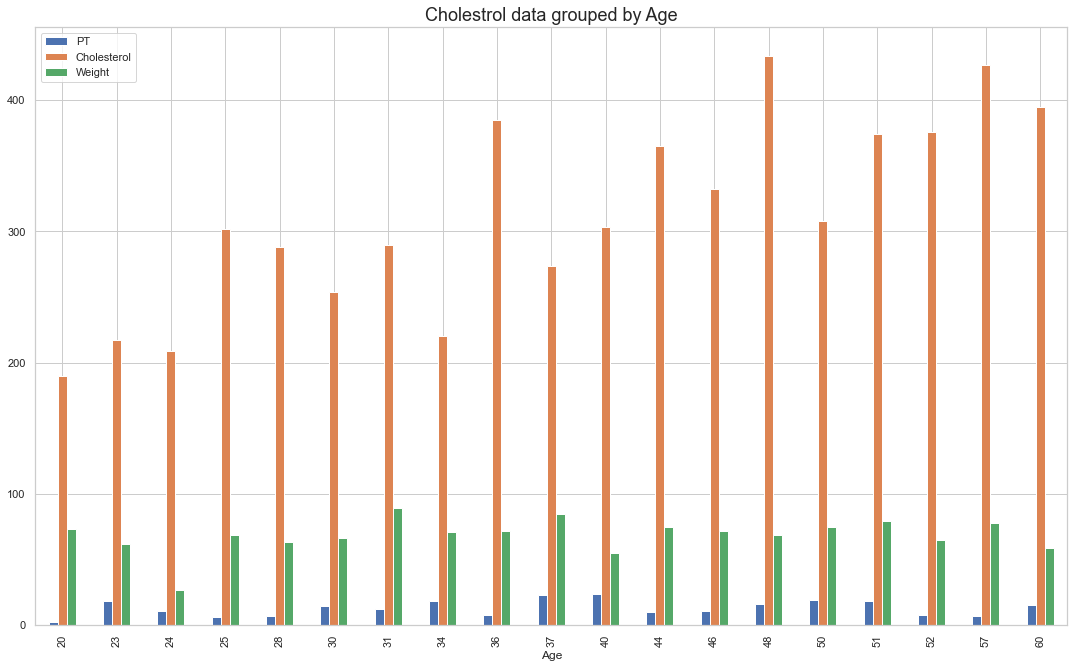

In [33]:
#This is better

plt.rcParams["figure.figsize"] = (18.5, 11)

Data_df.groupby('Age').mean().plot(kind='bar')
plt.title('Cholestrol data grouped by Age', fontsize=18)

Text(0.5, 1.0, 'Cholestrol data grouped by Age')

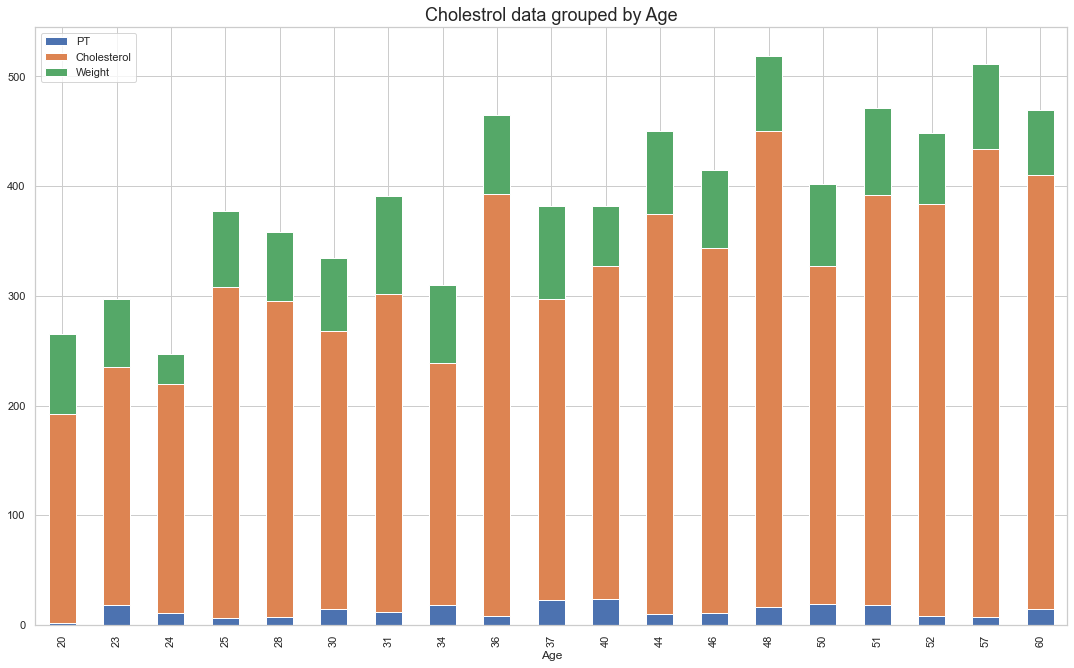

In [35]:
Data_df.groupby('Age').mean().plot(kind='bar', stacked=True)
plt.title('Cholestrol data grouped by Age', fontsize=18)

##  Basically finding out what might be a good predictor of the outcome variable.



Text(0, 0.5, 'Frequency')

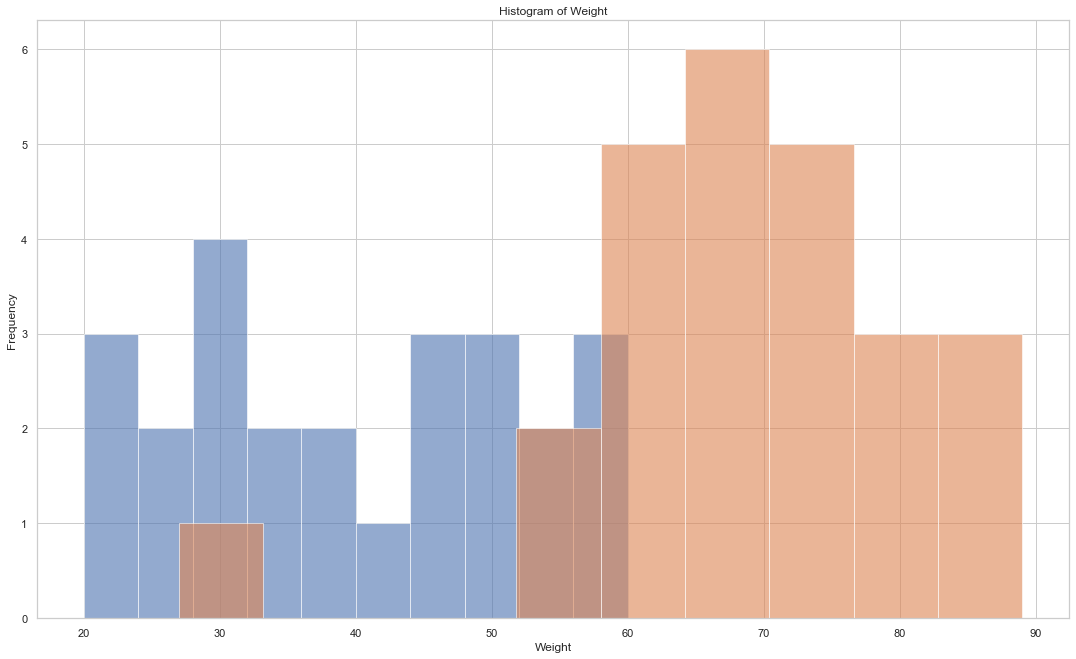

In [48]:
Data_df.Age.hist( alpha = 0.6)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

Data_df.Weight.hist( alpha = 0.6)
plt.title('Histogram of Weight')
plt.xlabel('Weight')
plt.ylabel('Frequency')


#Most of the customers of the bank in this dataset are in the age range of 50+.

In [54]:
## Corplot
corr = Data_df.drop('PT', axis=1).corr()

corr.style.background_gradient(cmap='coolwarm')


,Cholesterol,Weight,Age
Cholesterol,1.000000,0.265293,0.837353
Weight,0.265293,1.000000,0.240013
Age,0.837353,0.240013,1.000000


## Performing the Multiple Linear Regression

Once you added the data into Python, and identied important variables, you may use either of the following to get the regression result 
* `sklearn` 
* `statsmodels` 

Either method would work, but let’s review both methods for illustration purposes.

# Implementing the model -- Slide 12

## Multivariable models
1. Cholesterol ~ Age + Weight
2. Cholesterol ~ Age + Weight + Age*Weight

In [71]:
# define your X and y
## Note: ere we have 2 variables for multiple regression. 
#  If you just want to use one variable for simple linear regression, 
#  then use X = df['Age'] for example.Alternatively, 
#  you may add additional variables within the brackets
X = Data_df[['Age','Weight']]   #series
y = Data_df['Cholesterol']      #pandas.core.series.Series

display(y.head(n=2))
display(X.head(n=2))

0    354
1    190
Name: Cholesterol, dtype: int64

,Age,Weight
0,46,84
1,20,73


In [82]:
# Slide 9
# 
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm
# Age 
X = Data_df[['Age']]   #series

#----
# Age + Weight + Age*Weight
X = Data_df[['Age', 'Weight']]   #series
#X['Weight_Age'] = Data_df.Age * Data_df.Weight

#----
y = Data_df['Cholesterol']      #pandas.core.series.Series

print("\n========================  With sklearn =========================")
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, y)

#print((regr))

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# prediction with sklearn
#New_Interest_Rate = 2.75
#New_Unemployment_Rate = 5.3
#print ('Predicted Stock Index Price: \n', regr.predict([[New_Interest_Rate ,New_Unemployment_Rate]]))

print("\n========================  With statsmodels =========================")
# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)


========================  With sklearn =========================
Intercept: 
 77.98253861487552
Coefficients: 
 [5.21659081 0.4173621 ]

========================  With statsmodels =========================
                            OLS Regression Results                            
Dep. Variable:            Cholesterol   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     26.36
Date:                Wed, 30 Mar 2022   Prob (F-statistic):           1.44e-06
Time:                        01:49:18   Log-Likelihood:                -128.54
No. Observations:                  25   AIC:                             263.1
Df Residuals:                      22   BIC:                             266.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
   

In [80]:
X = Data_df[['Age', 'Weight']]   #series
X['Weight_Age'] = Data_df.Age * Data_df.Weight
X.head()

,Age,Weight,Weight_Age
0,46,84,3864
1,20,73,1460
2,52,65,3380
3,30,70,2100
4,57,76,4332


In [ ]:
# 1:
from sklearn import linear_model
regr = linear_model.LinearRegression()   #instantiate
regr.fit(X, y)                           #fit
#predict the CO2 emission of a car where the weight is 2300kg, and the volume is 1300cm3:
#predictedCO2 = regr.predict([[2300, 1300]]) 

## Interpretation
# https://towardsdatascience.com/interpreting-coefficients-in-linear-and-logistic-regression-6ddf1295f6f1

## Logit Day 2 slide 7


In [89]:
# load the diabetes datasets
dataset = pd.read_excel("./HowardData.xls", sheet_name=1)
display(dataset.head(n=3))

#
dataset.columns = ["Patient", "Age", "CD"]
display(dataset.head(n=3))

#--
X = dataset[['Age']]
#----
y = dataset['CD'] 

,Patient,Age,CHD (1 = Yes; 0 = No)
0,1,22,0
1,2,23,0
2,3,24,0


,Patient,Age,CD
0,1,22,0
1,2,23,0
2,3,24,0


In [91]:
import statsmodels.api as sm

#log_clf = LogisticRegression()
X = sm.add_constant(X) # adding a constant


log_clf =sm.Logit(y, X)

classifier = log_clf.fit()

#y_pred = classifier.predict(X_test)

print(classifier.summary2())


Optimization terminated successfully.
         Current function value: 0.434417
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.363     
Dependent Variable: CD               AIC:              32.6715   
Date:               2022-03-30 02:05 BIC:              35.6645   
No. Observations:   33               Log-Likelihood:   -14.336   
Df Model:           1                LL-Null:          -22.494   
Df Residuals:       31               LLR p-value:      5.3618e-05
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-------------------------------------------------------------------
          Coef.    Std.Err.      z      P>|z|     [0.025     0.975]
-------------------------------------------------------------------
const    -6.7085     2.3540   -2.8498   0.0044   -11.3222   -2.0947
Age       0.1315     0.0463    2.8378   0.0045     0.0407 

In [ ]:
# Slide 15
# Generalized Linear Models 
# https://www.statsmodels.org/v0.10.1/glm.html
# https://www.statsmodels.org/stable/regression.html
# https://regenerativetoday.com/logistic-regression-model-analysis-visualization-and-prediction/

# The data
dataset = pd.read_excel("./HowardData.xls", sheet_name=0)
dataset.columns = ["dBP", "Drug", "Age", "Sex"]
dataset.head(n=3)

## Example1  
model = sm.GLM.from_formula("CD ~ Age", family = sm.families.Binomial(), data=dataset)
result = model.fit()
result.summary()

## Example2
formular1 = "dBP ~ Drug + Age + Sex + Drug*Age + Drug*Sex"
formular2 = "dBP ~ Drug + Age + Sex + Drug*Age"

#model = sm.GLM.from_formula(formular, family = sm.families.Binomial(), data=dataset)
model = sm.OLS.from_formula(formular2, data=dataset)
result = model.fit()
result.summary()


In [92]:
# https://regenerativetoday.com/logistic-regression-model-analysis-visualization-and-prediction/
# 
model = sm.GLM.from_formula("CD ~ Age", family = sm.families.Binomial(), data=dataset)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                     CD   No. Observations:                   33
Model:                            GLM   Df Residuals:                       31
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14.336
Date:                Wed, 30 Mar 2022   Deviance:                       28.672
Time:                        02:11:20   Pearson chi2:                     27.6
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.7085      2.354     -2.850      0.004     -11.322      -2.095
Age            0.1315      0.046      2.838      0.005       0.041       0.222
==============================================================================
"""

In [94]:
dataset = pd.read_excel("./HowardData.xls", sheet_name=0)
dataset.columns = ["dBP", "Drug", "Age", "Sex"]
dataset.head(n=3)

,dBP,Drug,Age,Sex
0,73.0,0,65.0,1
1,59.0,1,47.0,1
2,67.0,1,89.0,0


In [103]:
# Slide 15
# Generalized Linear Models 
# https://www.statsmodels.org/v0.10.1/glm.html
# https://www.statsmodels.org/stable/regression.html

formular1 = "dBP ~ Drug + Age + Sex + Drug*Age + Drug*Sex"
formular2 = "dBP ~ Drug + Age + Sex + Drug*Age"

#model = sm.GLM.from_formula(formular, family = sm.families.Binomial(), data=dataset)
model = sm.OLS.from_formula(formular2, data=dataset)
result = model.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    dBP   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     21.29
Date:                Wed, 30 Mar 2022   Prob (F-statistic):           1.04e-13
Time:                        02:32:00   Log-Likelihood:                -516.28
No. Observations:                 144   AIC:                             1043.
Df Residuals:                     139   BIC:                             1057.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        68.6732      5.389     12.744      0.000      58.019      79.328
Drug[T.1]       -10.4658      7.051     -1.484      0.140     -24.406       3.475
Drug[T. ]      6.224e-13   5.46e-14     11.389      0.000    5.14e-13     7.3e-13
Sex[T.1]         -2.2661      1.541     -1.471      0.144      -5.312       0.780
Sex[T. ]       5.015e-15   1.87e-15      2.686      0.008    1.32e-15    8.71e-15
Age               0.2222      0.077      2.893      0.004       0.070       0.374
Drug[T.1]:Age     0.0122      0.112      0.109      0.913      -0.209       0.233
Drug[T. ]:Age          0          0        nan        nan           0           0
==============================================================================
Omnibus:                        0.976   Durbin-Watson:                   1.859
Prob(Omnibus):                  0.614   Jarque-Bera (JB):                0.619
Skew:                          -0.128   Prob(JB):                        0.734
Kurtosis:                       3.193   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [55]:
#Implementing the model -- Slide 12

# Linear Regression
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LinearRegression

# load the diabetes datasets
dataset = datasets.load_diabetes()

# fit a linear regression model to the data
model = LinearRegression()
model.fit(dataset.data, dataset.target)
print(model)

# make predictions
expected = dataset.target
predicted = model.predict(dataset.data)

# >>>>>>>Print out the statistics<<<<<<<<<<<<<
model.summary()

# summarize the fit of the model
mse = np.mean((predicted-expected)**2)
print model.intercept_, model.coef_, mse, 
print(model.score(dataset.data, dataset.target))

NameError: name 'y' is not defined

In [213]:
import math

print(math.e)
print(math.exp(1))

2.718281828459045
2.718281828459045


In [ ]:
## Python Exercises, Practice, Solution
#https://www.w3resource.com/python-exercises/#google_vignette
# https://holypython.com/intermediate-python-exercises/

In [241]:
## Odds And Log Odds  Slide 10 -- HowardU-4-1-22
# https://regenerativetoday.com/logistic-regression-model-analysis-visualization-and-prediction/
#
import math
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

#Using the observation on slide 39, compute the z-test of diffences in proportions for the 2 samples

#                 A    B
count = np.array([46,  54])
nobs = np.array([37,  63])

#table
table = [count, nobs]
display(table)

#dataframe
df = pd.DataFrame(table, columns=["A", "B"], index={'Intervention', 'Control'})
display(df)

#ztest
stat, pval = proportions_ztest(count, nobs)
print("\nz = %.4f      |    p = %.4f (two-sided)\n---\n\n" % (stat, pval))

#odds ratio
import scipy.stats as stats
oddsratio, pvalue = stats.fisher_exact(table)
print(f'Odds Ratio: {oddsratio:.2f}     |   p-Value: {pvalue:.2f}')

#Assignment:  Calculate the p value and 95% confidence interval of the odds ratio for the table above.
# see this: https://www.statology.org/confidence-interval-for-odds-ratio/
odds_ratio = (46*63) / (37*54)
odds_ratio_sqrt = 1.96 * np.sqrt(odds_ratio)

#
#print(math.e);  #print(math.exp(1))
Lower_95CI, Upper_95CI =  [ math.exp(1) ** (ln(.599) - odds_ratio_sqrt), math.exp(1) ** (ln(.599) + odds_ratio_sqrt) ]
print(f'\n--\nLower 95% CI = {Lower_95CI:.3f}   |  Upper 95% CI = {Upper_95CI:.3f}\n')

 
#kasut

[array([46, 54]), array([37, 63])]

,A,B
Control,46,54
Intervention,37,63



z = inf      |    p = 0.0000 (two-sided)
---


Odds Ratio: 1.45     |   p-Value: 0.25

--
Lower 95% CI = 0.057   |  Upper 95% CI = 6.347



In [244]:
import math
import numpy as np
ln(10)

2.302585092994046

In [245]:
ln

<ufunc 'log'>

In [234]:
#np.float_power(math.e, myln(0.599) - 1.96 * odds_ratio_sqrt)
odds_ratio = 1/34 + 1/16 + 1/39 + 1/11
odds_ratio_sqrt = 1.96 * np.sqrt(odds_ratio)
[ math.exp(1) ** (ln(.599) - odds_ratio_sqrt), math.exp(1) ** (ln(.599) + odds_ratio_sqrt) ]

[0.24478300602250208, 1.4657921145351758]

,dBP,Age
Drug,,
0,82.267606,65.929577
1,70.534247,57.890411
,NaN,NaN


Text(0.5, 1.0, 'Cholestrol data grouped by Age')

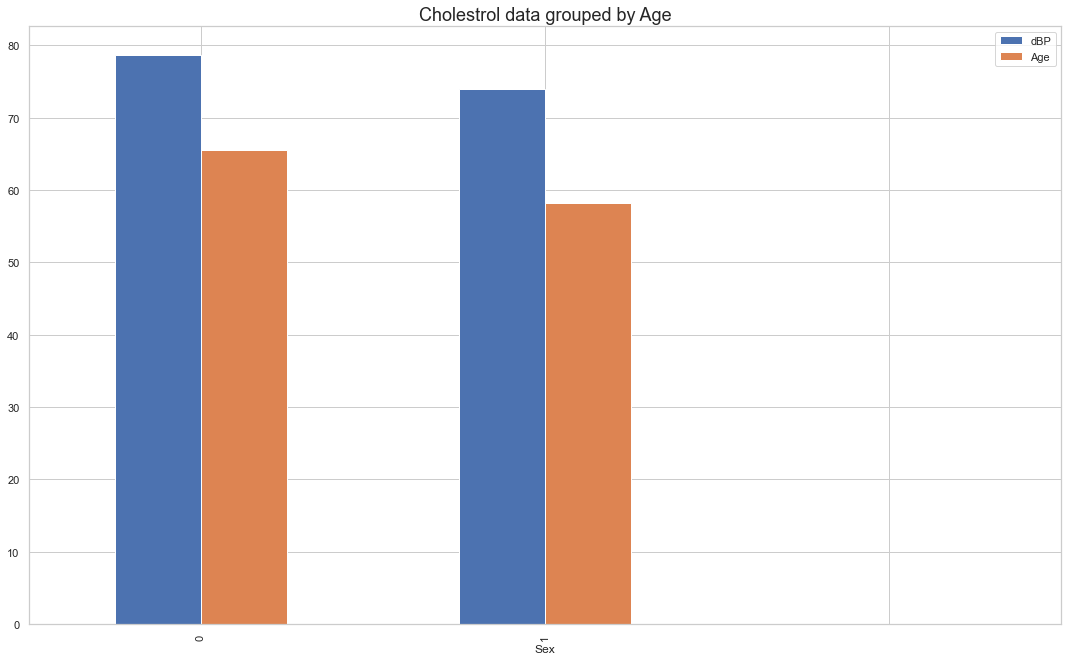

In [114]:

plt.rcParams["figure.figsize"] = (18.5, 11)

display(dataset.groupby('Drug').mean())

dataset.groupby('Sex').mean().plot(kind='bar')
plt.title('Cholestrol data grouped by Age', fontsize=18)


In [119]:
# Recoding
# 
dataset['GenderDummy_M'] = np.where(dataset['Sex'] == 0, "Male", "Female")


#Applying a lambda function
dataset['GenderDummy_F'] = dataset['Sex'].apply(lambda x: "Femail" if x == 1 else "Male")

dataset.head()


,dBP,Drug,Age,Sex,GenderDummy_F,GenderDummy_M
0,73.0,0,65.0,1,Femail,Female
1,59.0,1,47.0,1,Femail,Female
2,67.0,1,89.0,0,Male,Male
3,68.0,0,44.0,1,Femail,Female
4,68.0,0,39.0,1,Femail,Female


In [ ]:
### https://www.sfu.ca/~mjbrydon/tutorials/BAinPy/01_intro.html


In [120]:
# How to Drop Rows with NaN Values in Pandas DataFrame  -- slide 27
dataset.dropna(inplace=True)
display(dataset.groupby('Drug').mean())

,dBP,Age
Drug,,
0,82.267606,65.929577
1,70.534247,57.890411


In [ ]:
# Imputation methods assuming MAR -- Slide 31
# 1: Single imputation - How to impute missing values with means in Python?

#Step 1 - Import the library
import pandas as pd
import numpy as np
from sklearn.preprocessing import Imputer

# We have imported pandas, numpy and Imputer from sklearn.preprocessing.

#----
#Step 3 - Using Imputer to fill the nun values with the Mean


In [133]:
dataset = pd.read_excel("./HowardData.xls", sheet_name=0)
display(dataset.head(n=3))

#
dataset.columns = ["dBP", "Drug", "Age", "Sex"]
display(dataset.head(n=3))

,dBP,drug,age,sex
0,73.0,0,65.0,1
1,59.0,1,47.0,1
2,67.0,1,89.0,0


,dBP,Drug,Age,Sex
0,73.0,0,65.0,1
1,59.0,1,47.0,1
2,67.0,1,89.0,0


In [135]:
dataset.dtypes

dBP     float64
Drug     object
Age     float64
Sex      object
dtype: object

In [134]:
# https://www.projectpro.io/recipes/impute-missing-values-with-means-in-python
# https://scikit-learn.org/stable/modules/impute.html
# 
from sklearn.impute import SimpleImputer
miss_mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

miss_mean_imputer = miss_mean_imputer.fit(dataset)

imputed_df = miss_mean_imputer.transform(dataset.values)

print(imputed_df)

type(imputed_df)

ValueError: Cannot use mean strategy with non-numeric data:
could not convert string to float: ''

In [1]:
## Cubic spline 
#https://pythonnumericalmethods.berkeley.edu/notebooks/chapter17.03-Cubic-Spline-Interpolation.html

In [ ]:
# from scipy.interpolate import CubicSpline

import matplotlib.pyplot as plt

x = np.arange(10)

y = np.sin(x)

cs = CubicSpline(x, y)

In [ ]:
# https://www.analyticsvidhya.com/blog/2016/01/ridge-lasso-regression-python-complete-tutorial/

#Lasso Regression

# make a prediction with a lasso regression model on the dataset
from pandas import read_csv
from sklearn.linear_model import Lasso
# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
dataframe = read_csv(url, header=None)
data = dataframe.values
X, y = data[:, :-1], data[:, -1]
# define model
model = Lasso(alpha=1.0)
# fit model
model.fit(X, y)
# define new data
row = [0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98]
# make a prediction
yhat = model.predict([row])
# summarize prediction
print('Predicted: %.3f' % yhat)

In [ ]:
from sklearn import datasets
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
#
# Load the Boston Data Set
#
bh = datasets.load_boston()
X = bh.data
y = bh.target
#
# Create training and test split
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#
# Create an instance of Lasso Regression implementation
#
lasso = Lasso(alpha=1.0)
#
# Fit the Lasso model
#
lasso.fit(X_train, y_train)
#
# Create the model score
#
lasso.score(X_test, y_test), lasso.score(X_train, y_train)

## Types of Regression Analysis in Machine Learning

https://www.projectpro.io/article/types-of-regression-analysis-in-machine-learning/410

